In [47]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import TimeSeriesSplit

import acquire

from acquire import new_store_data, get_store_data, get_germany

import prepare

import statsmodels.api as sm

from prepare import prepare_store, prepare_germany

# plotting defaults
plt.rc('figure', figsize=(10, 5))
# plt.rc('font', size=12)
%config InlineBackend.figure_format='retina'


Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

# Store Data Exploration

In [2]:
df_store = prepare_store()
df_store.head()

sale_id  store_id  item_id  sale_amount  item_id.1   item_upc14  \
sale_date                                                                     
2013-01-01        1         1        1           13          1  35200264013   
2013-01-01   295813         3       17           26         17  88313590791   
2013-01-01   125995        10        7           32          7  70177154004   
2013-01-01   314073         3       18           45         18  21200725340   
2013-01-01   332333         3       19           34         19  41520035646   

             item_upc12          item_brand  \
sale_date                                     
2013-01-01  35200264013            Riceland   
2013-01-01  88313590791               Ducal   
2013-01-01  70177154004  Twinings Of London   
2013-01-01  21200725340              Scotch   
2013-01-01  41520035646             Careone   

                                                    item_name  item_price  \
sale_date                                                                   
2013-01-01                     Riceland American Jazmine Rice        0.84   
2013-01-01                            Ducal Refried Red Beans        1.16   
2013-01-01  Twinings Of London Classics Lady Grey Tea - 20 Ct        9.64   
2013-01-01    Scotch Removable Clear Mounting Squares - 35 Ct        4.39   
2013-01-01                     Careone Family Comb Set - 8 Ct        0.74   

            store_id.1            store_address  store_zipcode   store_city  \
sale_date                                                                     
2013-01-01           1   12125 Alamo Ranch Pkwy          78253  San Antonio   
2013-01-01           3  2118 Fredericksburg Rdj          78201  San Antonio   
2013-01-01          10     8503 NW Military Hwy          78231  San Antonio   
2013-01-01           3  2118 Fredericksburg Rdj          78201  San Antonio   
2013-01-01           3  2118 Fredericksburg Rdj          78201  San Antonio   

           store_state  month  day_of_week  sales_total  
sale_date                                                
2013-01-01          TX      1            1        10.92  
2013-01-01          TX      1            1        30.16  
2013-01-01          TX      1            1       308.48  
2013-01-01          TX      1            1       197.55  
2013-01-01          TX      1            1        25.16

In [4]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_id        913000 non-null  int64  
 1   store_id       913000 non-null  int64  
 2   item_id        913000 non-null  int64  
 3   sale_amount    913000 non-null  int64  
 4   item_id.1      913000 non-null  int64  
 5   item_upc14     913000 non-null  int64  
 6   item_upc12     913000 non-null  int64  
 7   item_brand     913000 non-null  object 
 8   item_name      913000 non-null  object 
 9   item_price     913000 non-null  float64
 10  store_id.1     913000 non-null  int64  
 11  store_address  913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  store_city     913000 non-null  object 
 14  store_state    913000 non-null  object 
 15  month          913000 non-null  int64  
 16  day_of_week    913000 non-null  int64  
 17  sales_total  

In [7]:
df_store.shape

(913000, 18)

## Split data by year

In [9]:
print('Date Range:', df_store.index.min(), 'to', df_store.index.max())

Date Range: 2013-01-01 00:00:00 to 2017-12-31 00:00:00


In [20]:


train = df_store.loc[:'2015'].copy()
validate = df_store.loc['2016'].copy()
test = df_store.loc['2017'].copy()

In [21]:
train.shape

(547500, 18)

In [22]:
validate.shape


(183000, 18)

In [23]:

test.shape

(182500, 18)

## 1. Visualize target variables (total sales)

In [24]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01     30.16
2013-01-01    308.48
2013-01-01    197.55
2013-01-01     25.16
Name: sales_total, dtype: float64

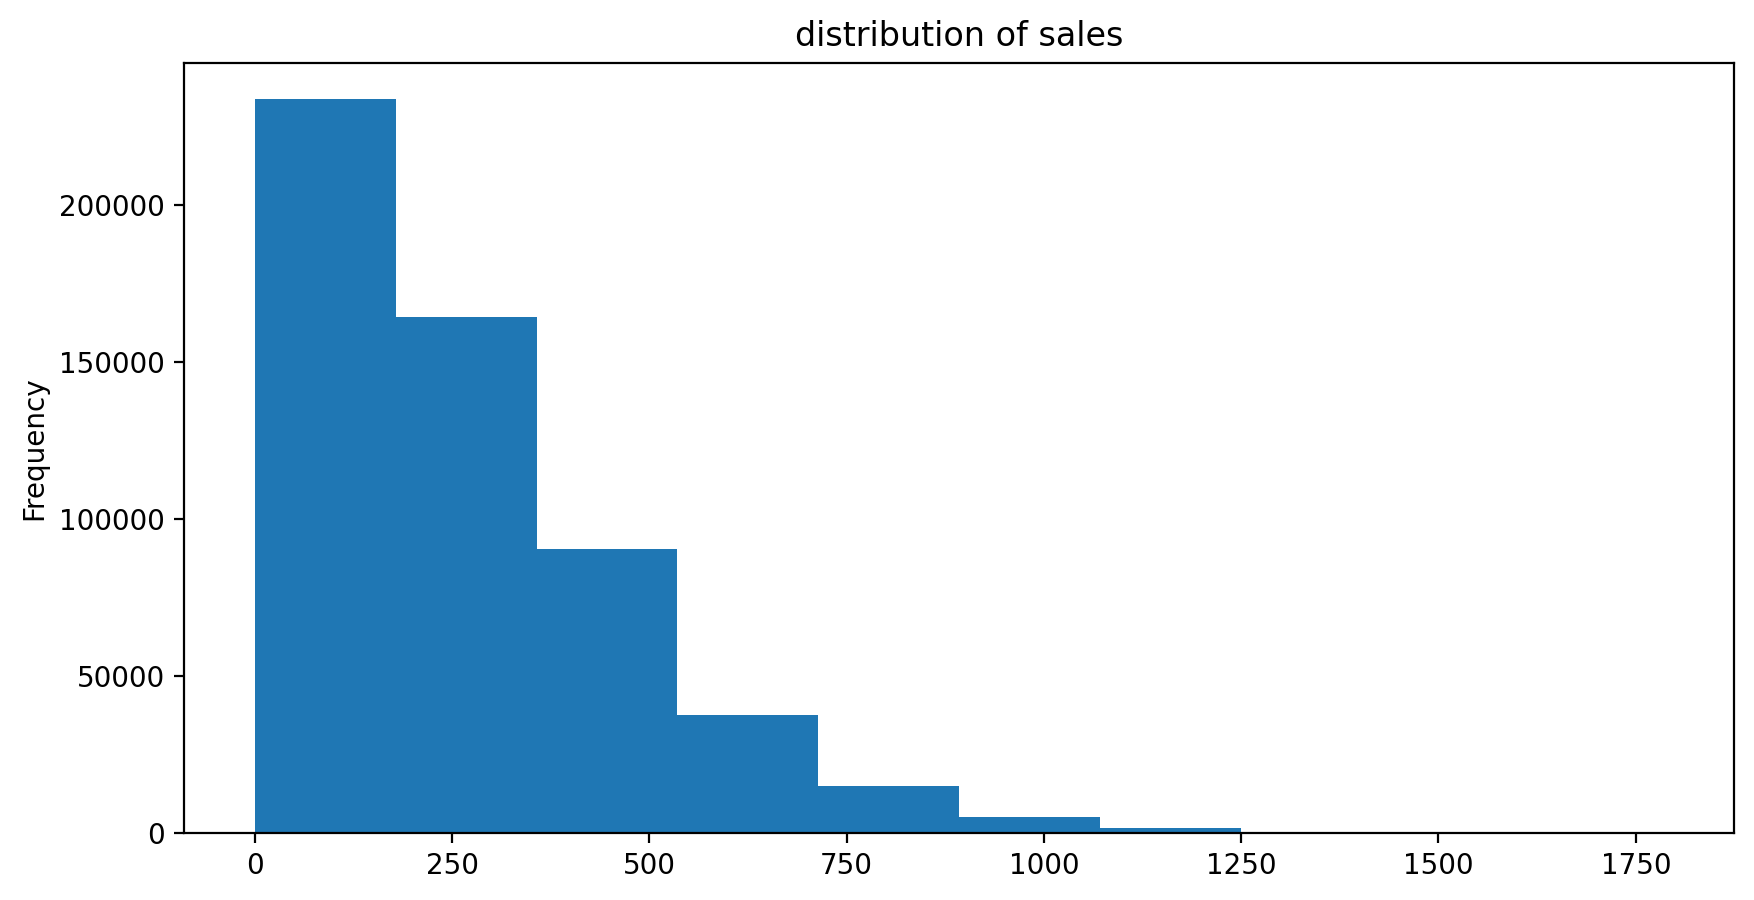

In [25]:
train.sales_total.plot.hist()
plt.title('distribution of sales')
plt.show()

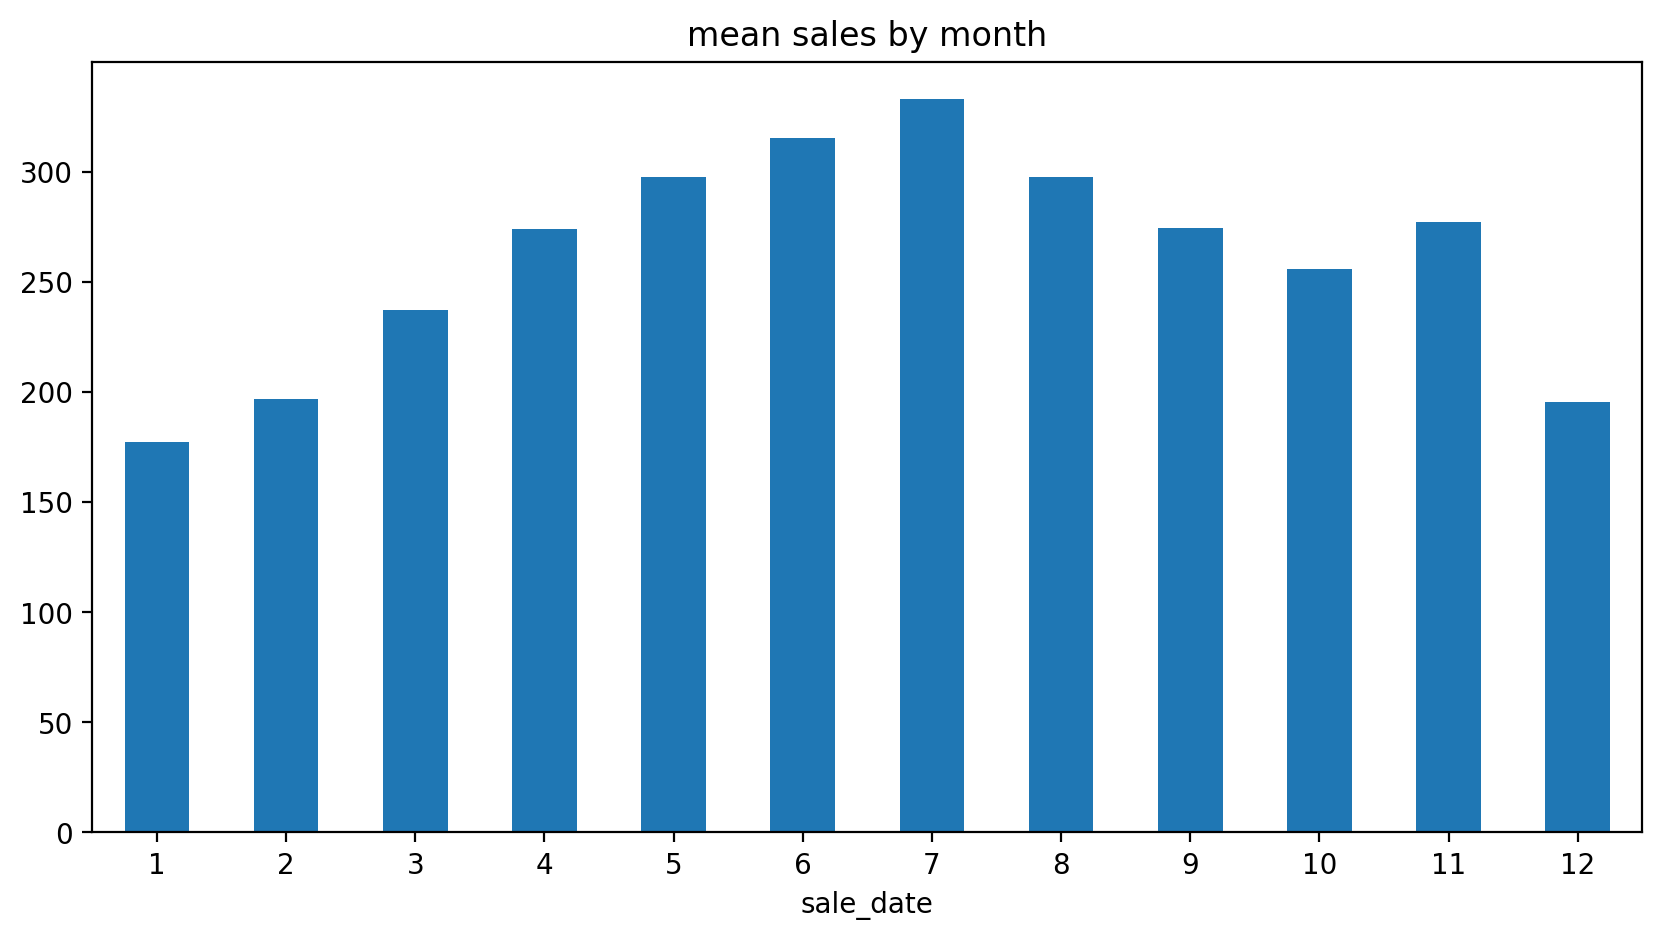

In [26]:
train.groupby(train.index.month).sales_total.mean()\
.plot.bar().tick_params('x', rotation=0)

plt.title('mean sales by month')
plt.show()

In [27]:
train['weekday'] = train.index.day_name()
train['day_num'] = train.index.day_of_week

In [28]:
train.head()

sale_id  store_id  item_id  sale_amount  item_id.1   item_upc14  \
sale_date                                                                     
2013-01-01        1         1        1           13          1  35200264013   
2013-01-01   295813         3       17           26         17  88313590791   
2013-01-01   125995        10        7           32          7  70177154004   
2013-01-01   314073         3       18           45         18  21200725340   
2013-01-01   332333         3       19           34         19  41520035646   

             item_upc12          item_brand  \
sale_date                                     
2013-01-01  35200264013            Riceland   
2013-01-01  88313590791               Ducal   
2013-01-01  70177154004  Twinings Of London   
2013-01-01  21200725340              Scotch   
2013-01-01  41520035646             Careone   

                                                    item_name  item_price  \
sale_date                                                                   
2013-01-01                     Riceland American Jazmine Rice        0.84   
2013-01-01                            Ducal Refried Red Beans        1.16   
2013-01-01  Twinings Of London Classics Lady Grey Tea - 20 Ct        9.64   
2013-01-01    Scotch Removable Clear Mounting Squares - 35 Ct        4.39   
2013-01-01                     Careone Family Comb Set - 8 Ct        0.74   

            store_id.1            store_address  store_zipcode   store_city  \
sale_date                                                                     
2013-01-01           1   12125 Alamo Ranch Pkwy          78253  San Antonio   
2013-01-01           3  2118 Fredericksburg Rdj          78201  San Antonio   
2013-01-01          10     8503 NW Military Hwy          78231  San Antonio   
2013-01-01           3  2118 Fredericksburg Rdj          78201  San Antonio   
2013-01-01           3  2118 Fredericksburg Rdj          78201  San Antonio   

           store_state  month  day_of_week  sales_total  weekday  day_num  
sale_date                                                                  
2013-01-01          TX      1            1        10.92  Tuesday        1  
2013-01-01          TX      1            1        30.16  Tuesday        1  
2013-01-01          TX      1            1       308.48  Tuesday        1  
2013-01-01          TX      1            1       197.55  Tuesday        1  
2013-01-01          TX      1            1        25.16  Tuesday        1

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_16544/4262645423.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('weekday').mean().sort_values('day_num').sales_total.plot.bar()


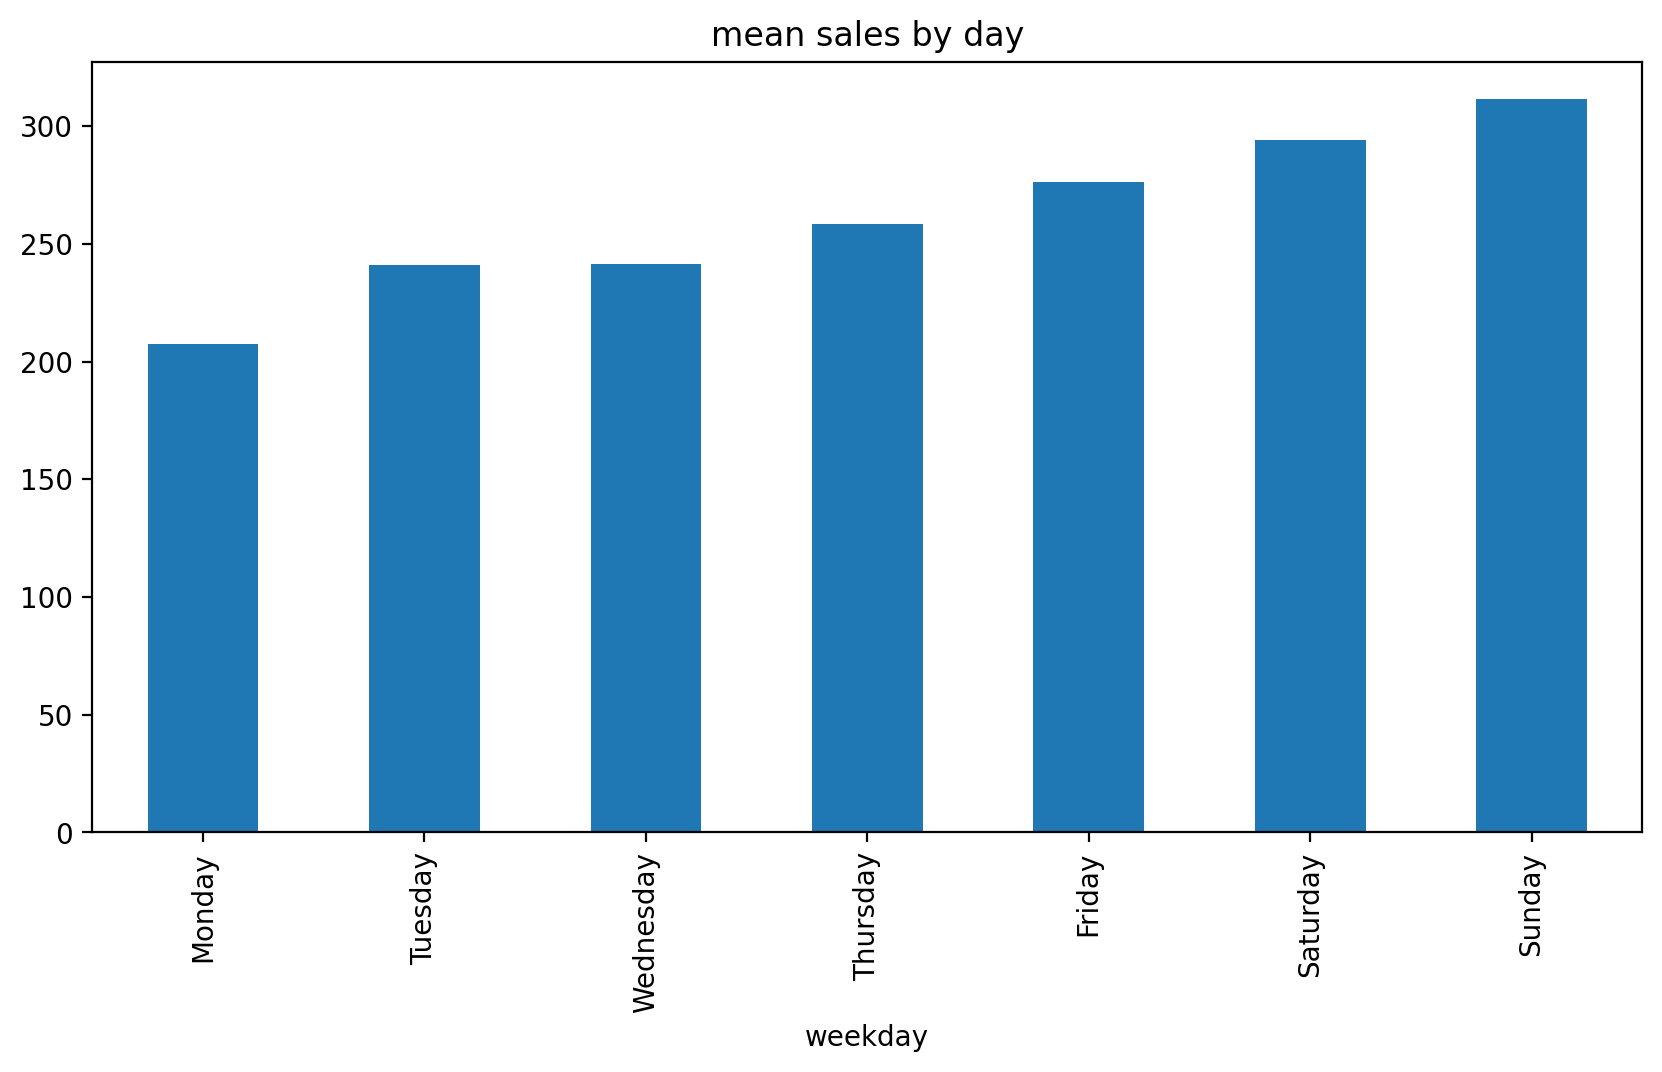

In [30]:
train.groupby('weekday').mean().sort_values('day_num').sales_total.plot.bar()

plt.title('mean sales by day')
plt.show()

## 2. Target over time

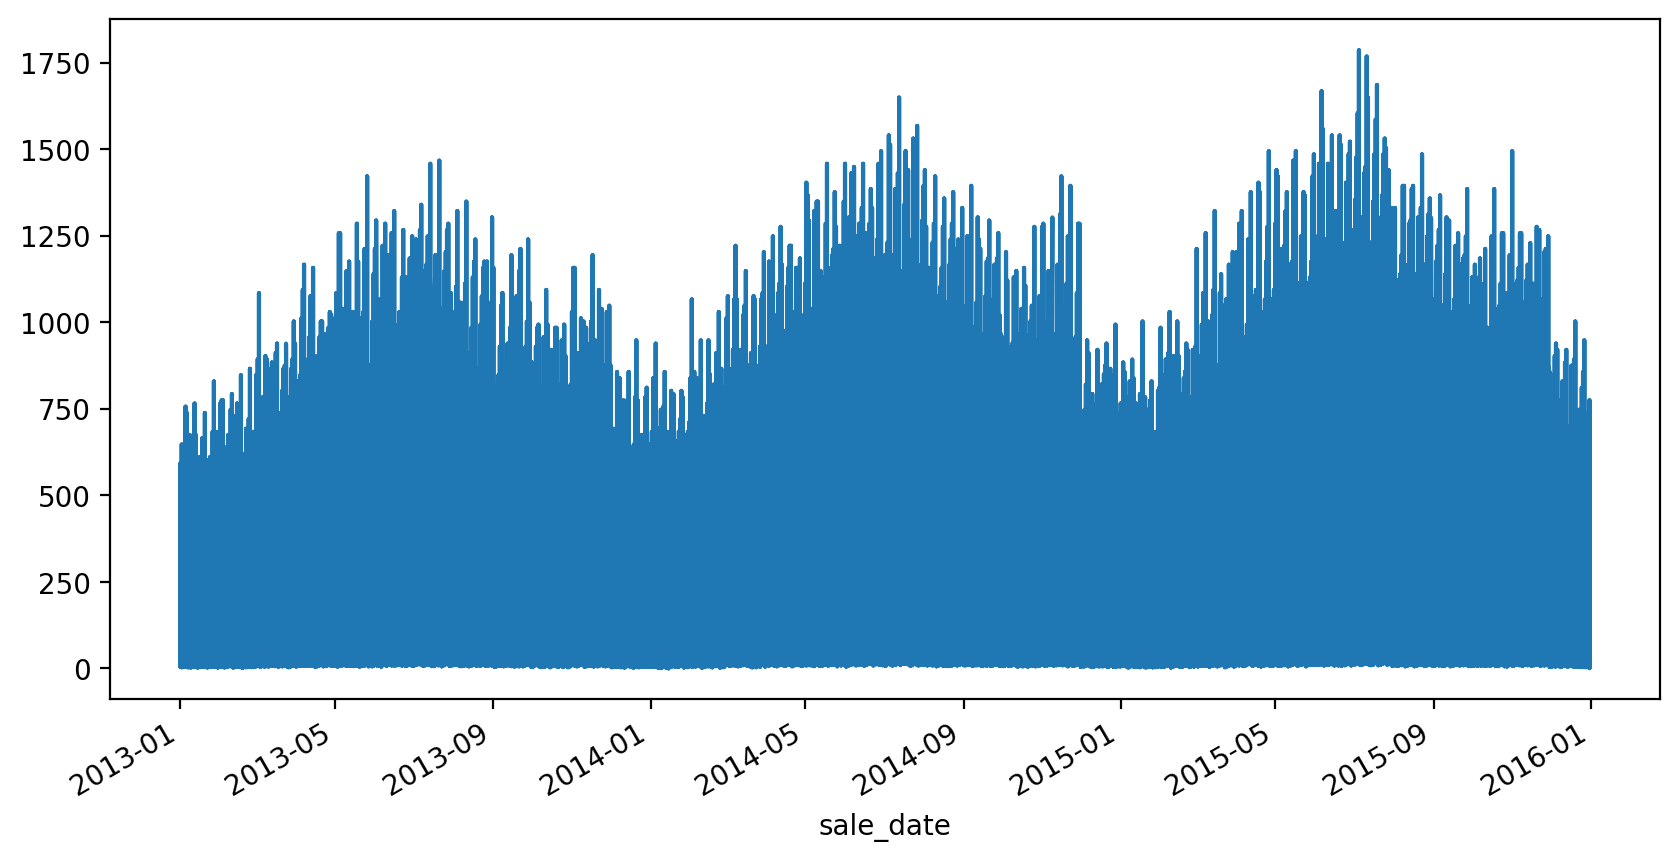

In [31]:
y.plot();

## 3. target over various periods of time

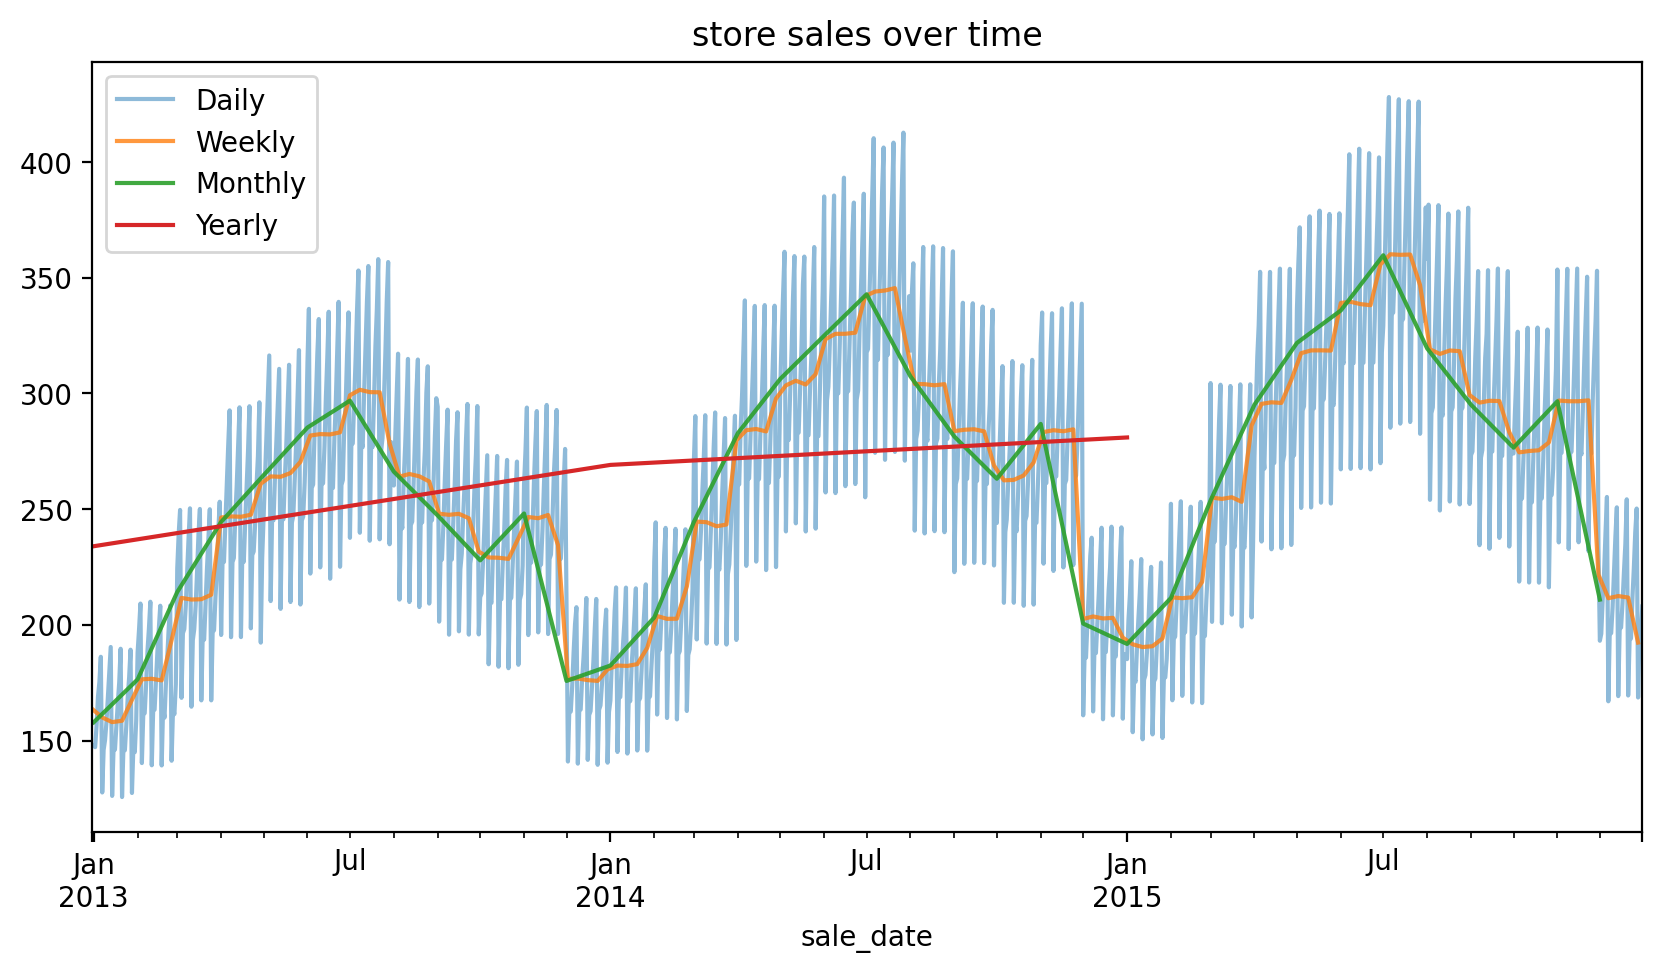

In [32]:
y.resample('D').mean().plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(alpha=0.9, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')

plt.title('store sales over time')
plt.legend()
plt.show()

## 4. change in target over time

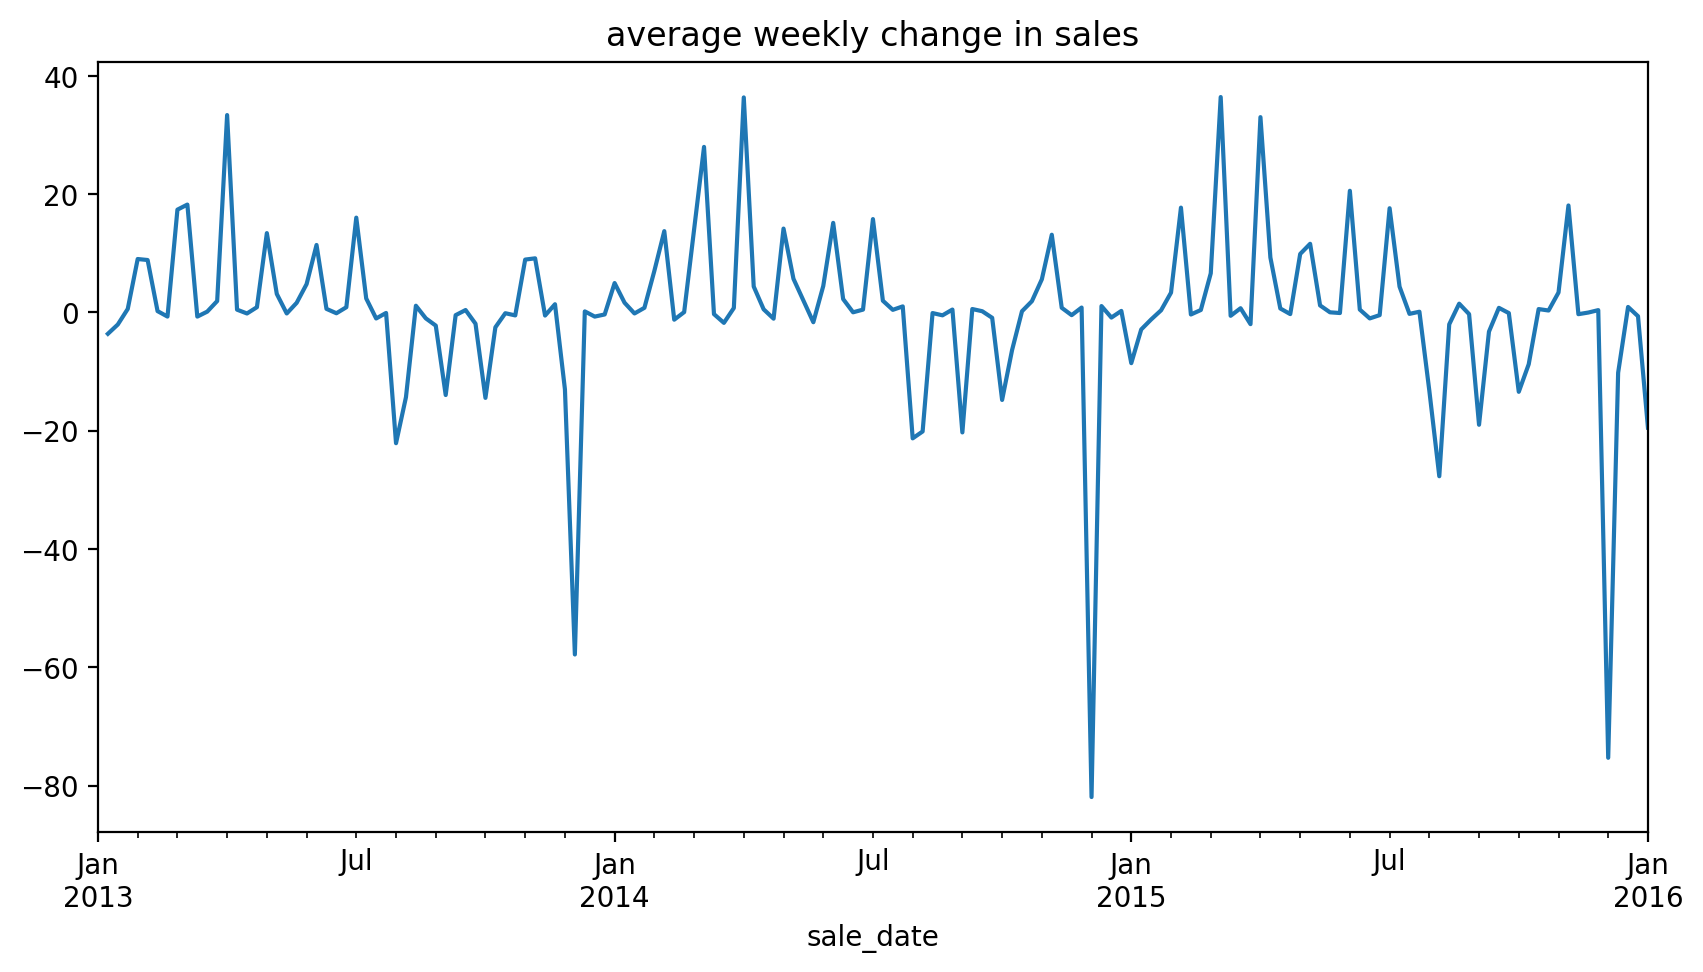

In [35]:
y.resample('W').mean().diff().plot(title='average weekly change in sales');

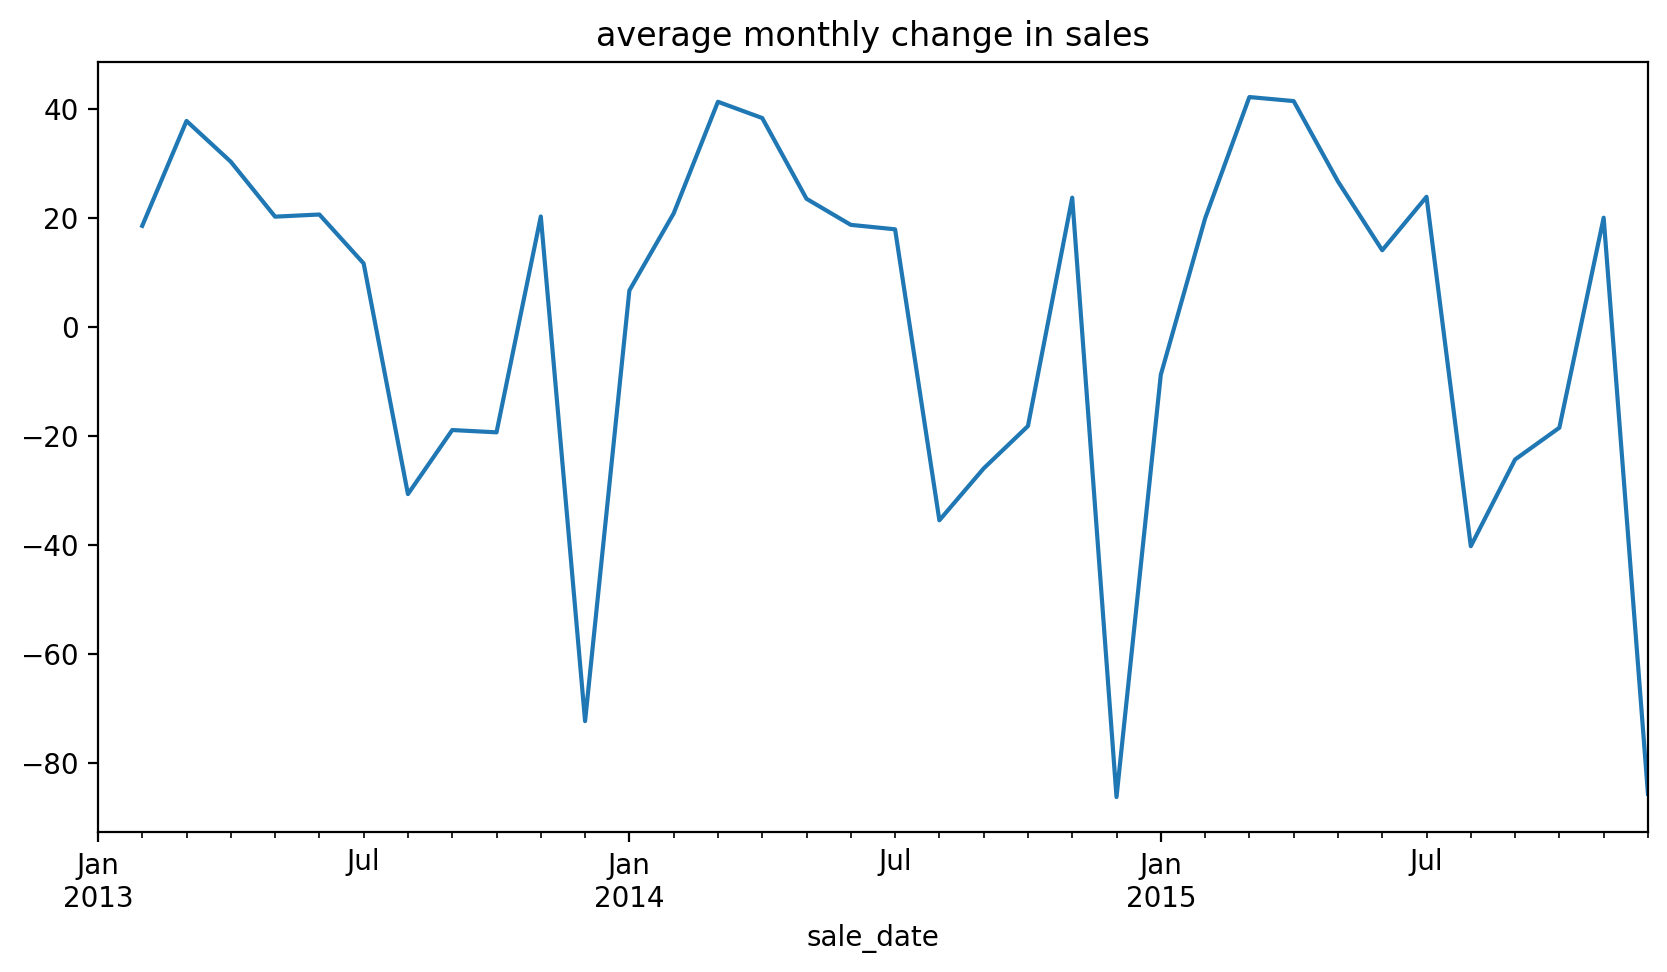

In [36]:
y.resample('M').mean().diff().plot(title='average monthly change in sales');

## 5. Seasonal Plot

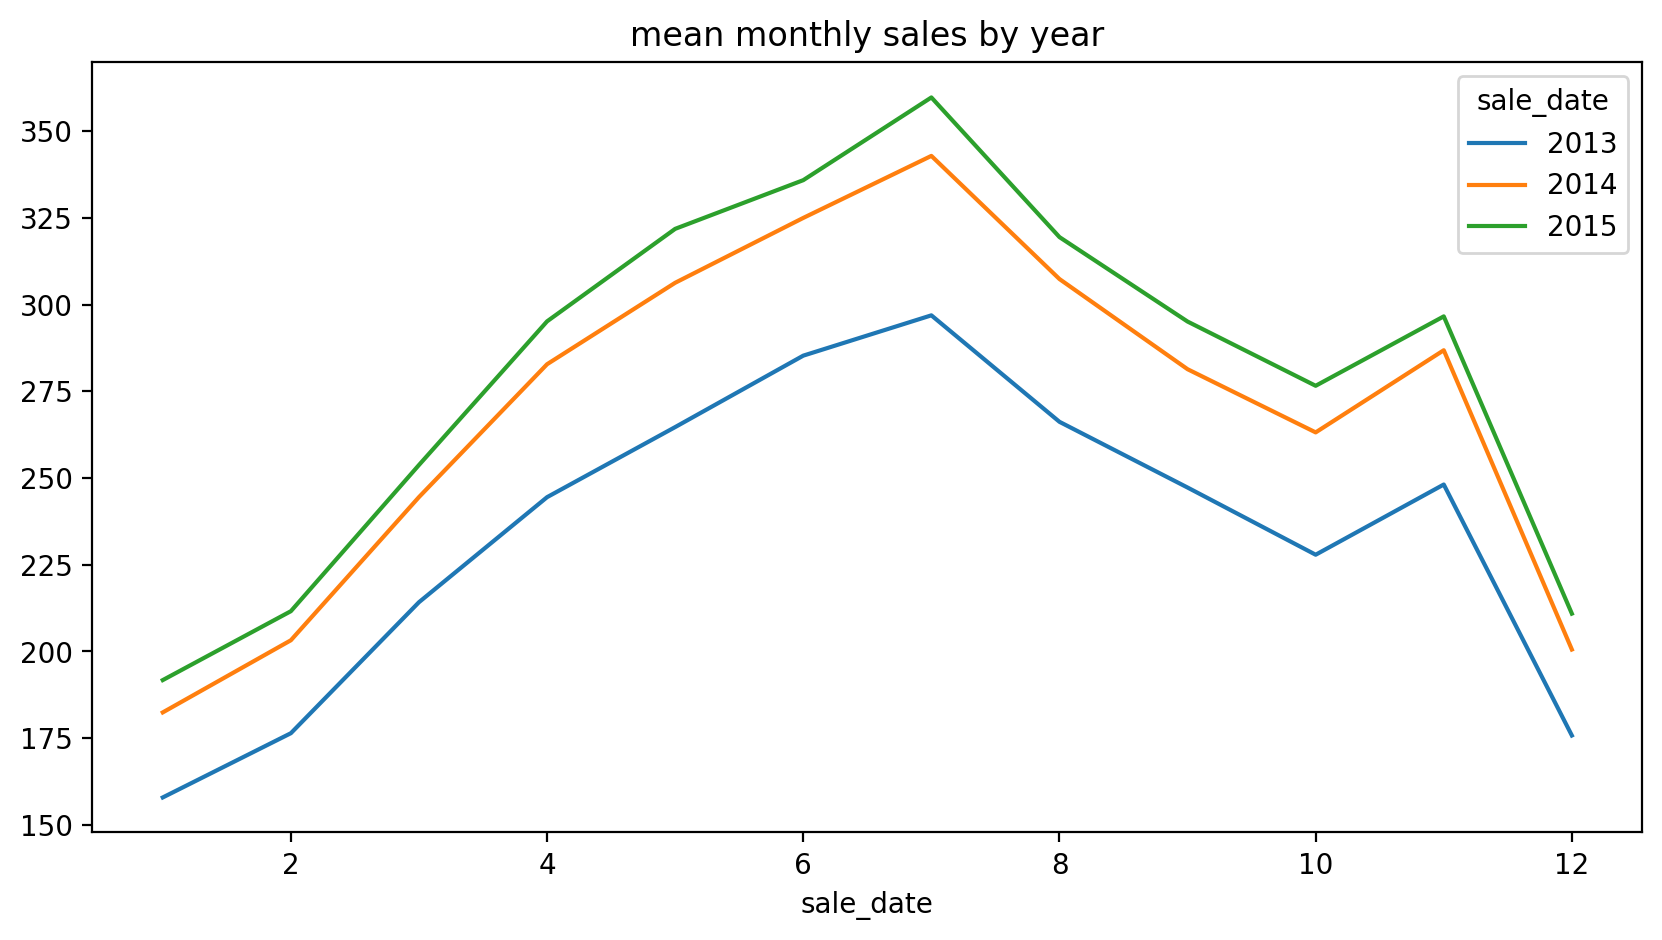

In [37]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.title('mean monthly sales by year')
plt.show()

## 6. Seasonal Subseries Plot

In [38]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

sale_date          1           2           3           4           5   \
sale_date                                                               
2013       157.894723  176.411855  214.181650  244.460082  264.663123   
2014       182.410791  203.207122  244.488991  282.786091  306.267538   
2015       191.725206  211.589839  253.739390  295.147608  321.813672   

sale_date          6           7           8           9           10  \
sale_date                                                               
2013       285.261279  296.881241  266.183375  247.237694  227.868064   
2014       324.965376  342.849100  307.345466  281.350430  263.133772   
2015       335.850784  359.698008  319.435676  295.088416  276.572155   

sale_date          11          12  
sale_date                          
2013       248.108656  175.753692  
2014       286.821036  200.538977  
2015       296.583045  210.886208

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_16544/2913358663.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ax, (month, subset) in zip(axs, table.iteritems()):


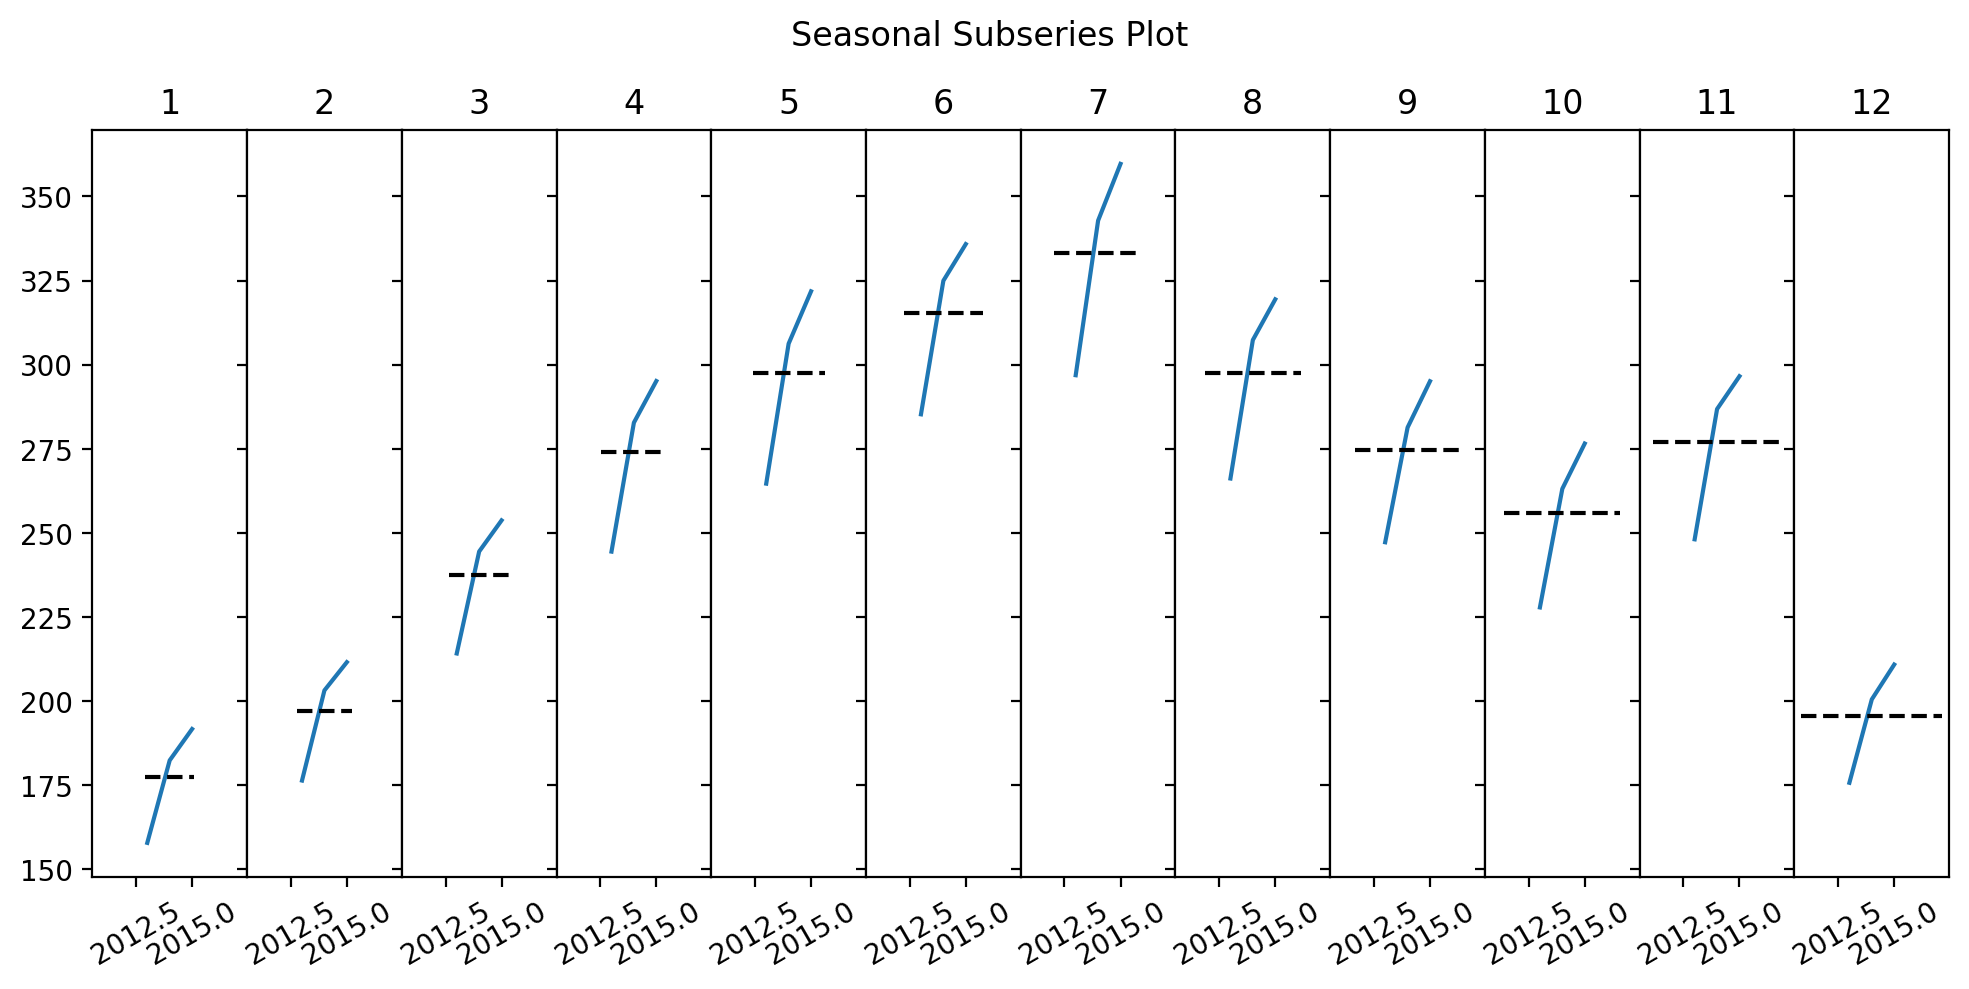

In [39]:
# unpacking my figure and axes elements
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)



## 7. Lag Plot

In [41]:
train['y(t + 1)'] = train.sales_total.shift(-1)
train.head()

sale_id  store_id  item_id  sale_amount  item_id.1   item_upc14  \
sale_date                                                                     
2013-01-01        1         1        1           13          1  35200264013   
2013-01-01   295813         3       17           26         17  88313590791   
2013-01-01   125995        10        7           32          7  70177154004   
2013-01-01   314073         3       18           45         18  21200725340   
2013-01-01   332333         3       19           34         19  41520035646   

             item_upc12          item_brand  \
sale_date                                     
2013-01-01  35200264013            Riceland   
2013-01-01  88313590791               Ducal   
2013-01-01  70177154004  Twinings Of London   
2013-01-01  21200725340              Scotch   
2013-01-01  41520035646             Careone   

                                                    item_name  item_price  \
sale_date                                                                   
2013-01-01                     Riceland American Jazmine Rice        0.84   
2013-01-01                            Ducal Refried Red Beans        1.16   
2013-01-01  Twinings Of London Classics Lady Grey Tea - 20 Ct        9.64   
2013-01-01    Scotch Removable Clear Mounting Squares - 35 Ct        4.39   
2013-01-01                     Careone Family Comb Set - 8 Ct        0.74   

            ...            store_address store_zipcode   store_city  \
sale_date   ...                                                       
2013-01-01  ...   12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-01  ...  2118 Fredericksburg Rdj         78201  San Antonio   
2013-01-01  ...     8503 NW Military Hwy         78231  San Antonio   
2013-01-01  ...  2118 Fredericksburg Rdj         78201  San Antonio   
2013-01-01  ...  2118 Fredericksburg Rdj         78201  San Antonio   

           store_state month  day_of_week  sales_total  weekday day_num  \
sale_date                                                                 
2013-01-01          TX     1            1        10.92  Tuesday       1   
2013-01-01          TX     1            1        30.16  Tuesday       1   
2013-01-01          TX     1            1       308.48  Tuesday       1   
2013-01-01          TX     1            1       197.55  Tuesday       1   
2013-01-01          TX     1            1        25.16  Tuesday       1   

            y(t + 1)  
sale_date             
2013-01-01     30.16  
2013-01-01    308.48  
2013-01-01    197.55  
2013-01-01     25.16  
2013-01-01    162.98  

[5 rows x 21 columns]

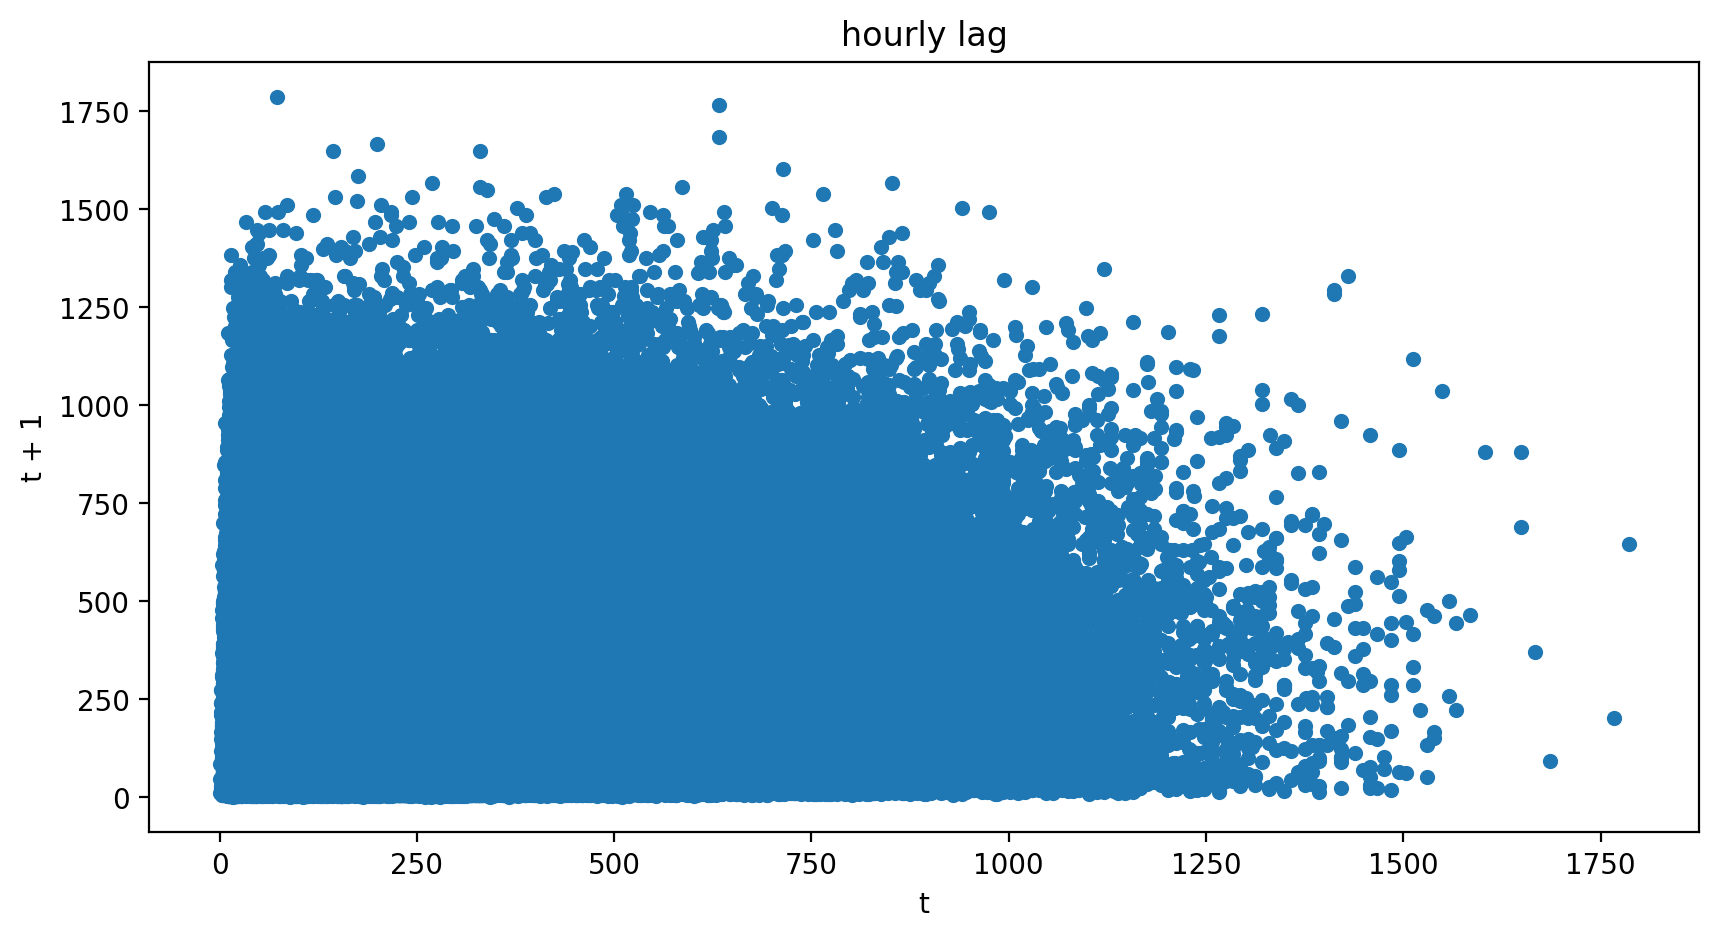

In [42]:


train.plot.scatter(x='sales_total', y='y(t + 1)').set(xlabel='t', ylabel='t + 1')
plt.title('hourly lag')
plt.show()



/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_16544/2943100522.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly = train.resample('W').mean().drop(columns='y(t + 1)')


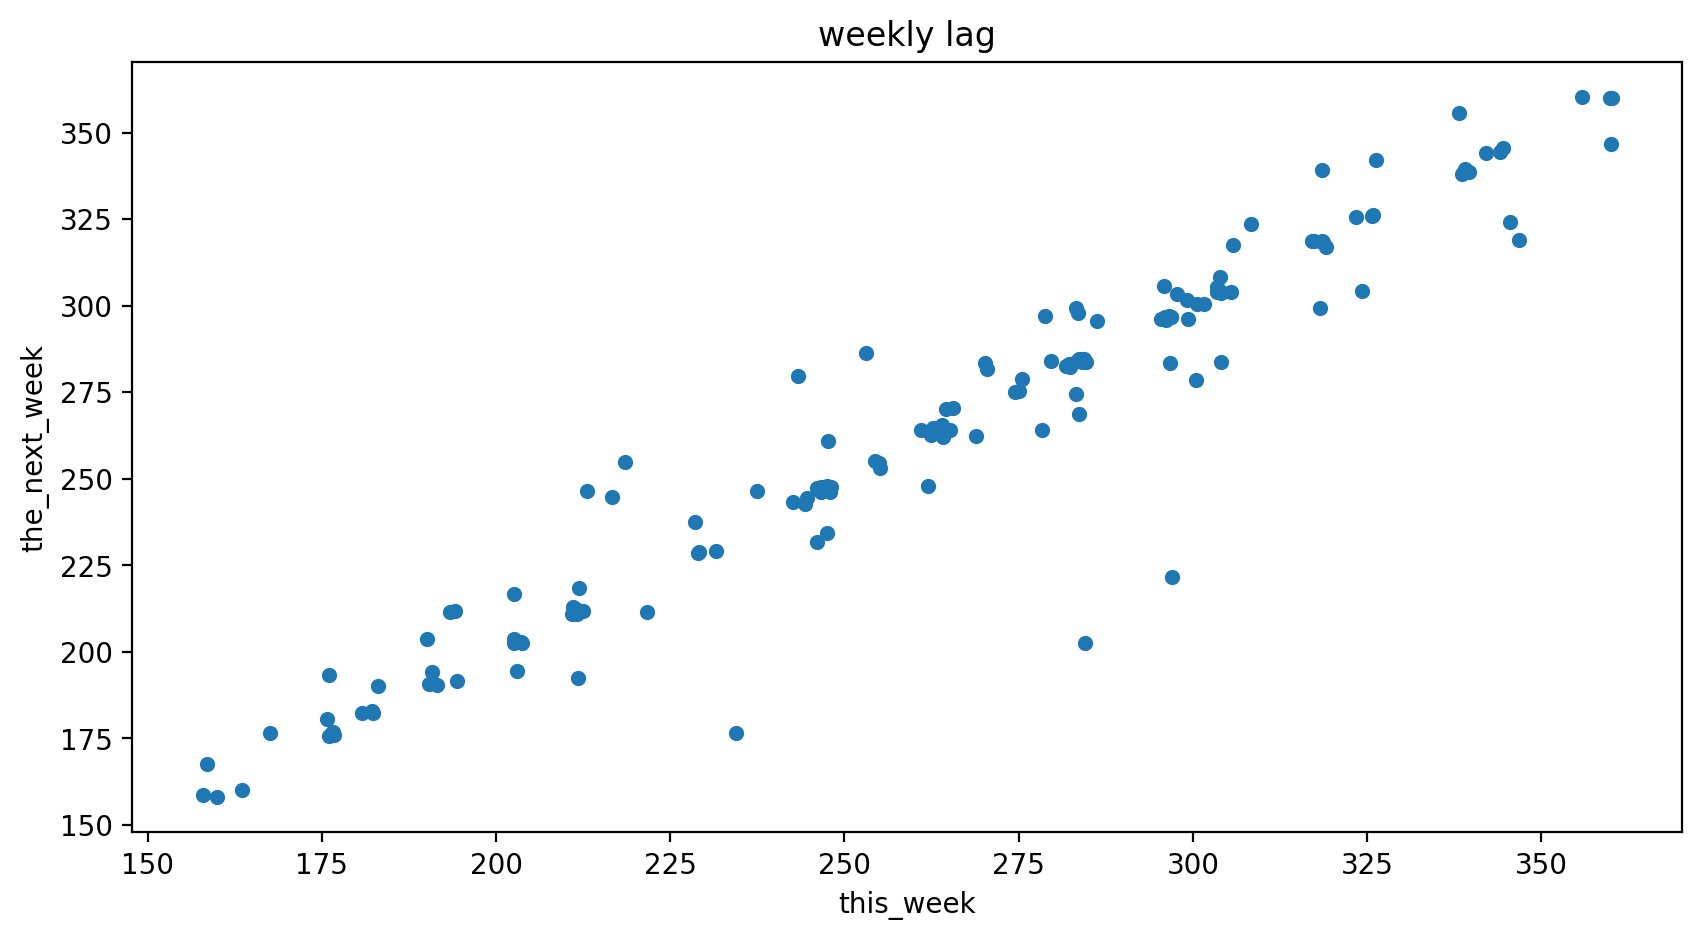

In [43]:


weekly = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
plt.title('weekly lag')
plt.show()



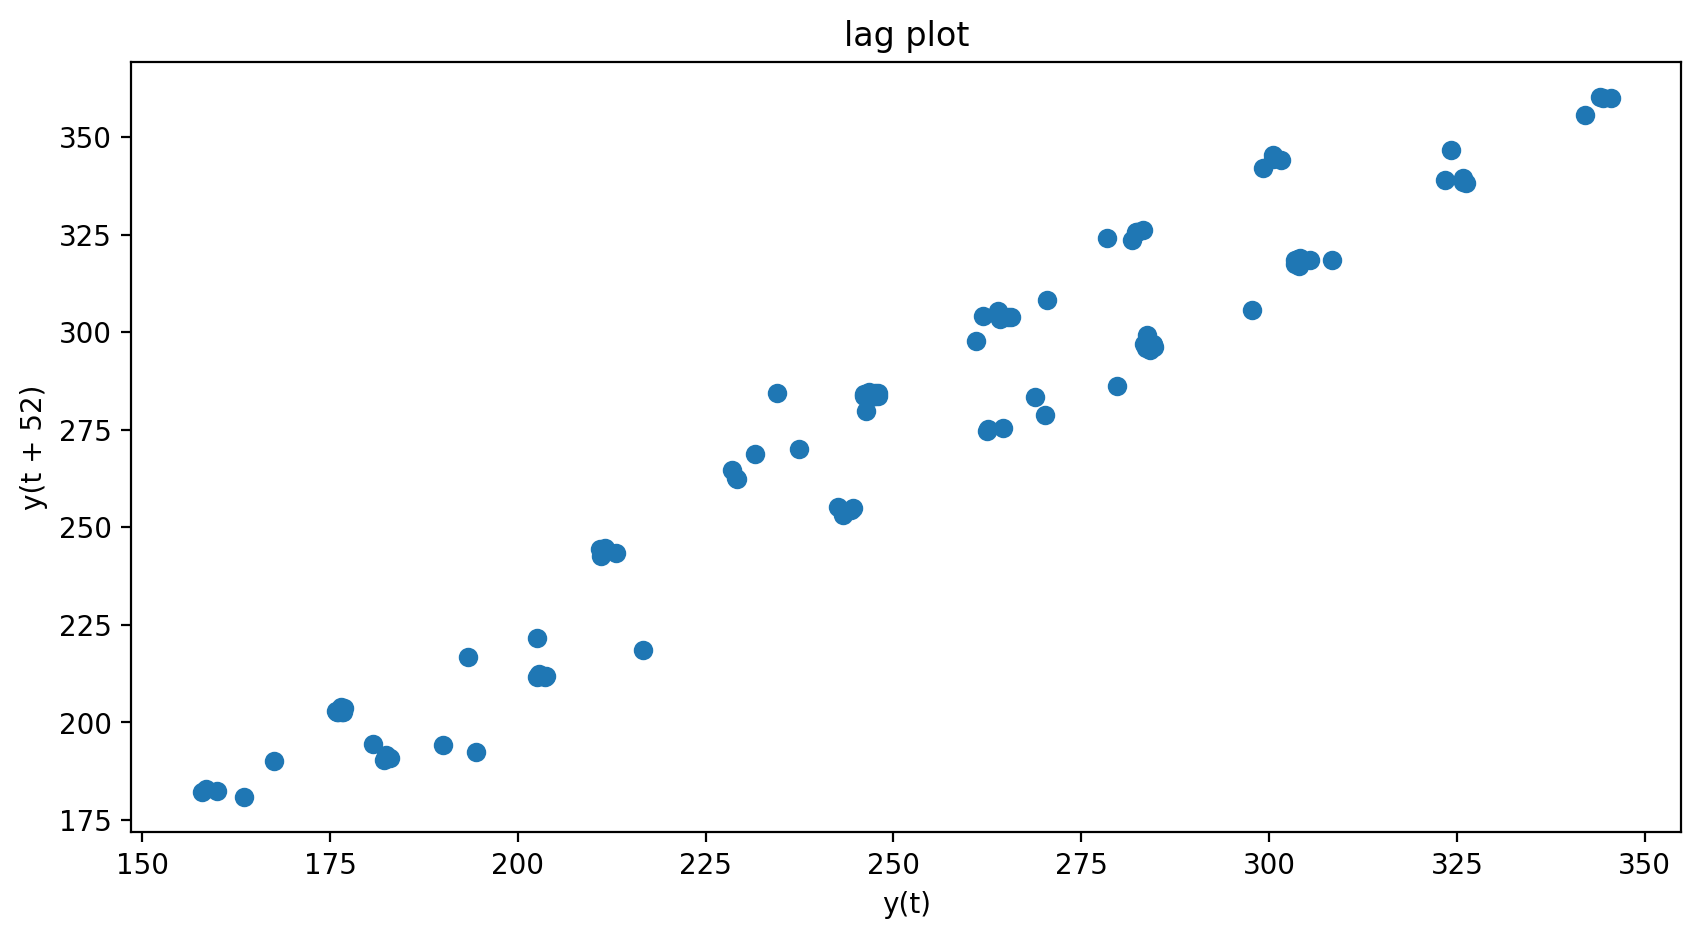

In [44]:
# 52 week (year) lag plot

pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=52)
plt.title('lag plot');

## 8. Autocorrelation Plot

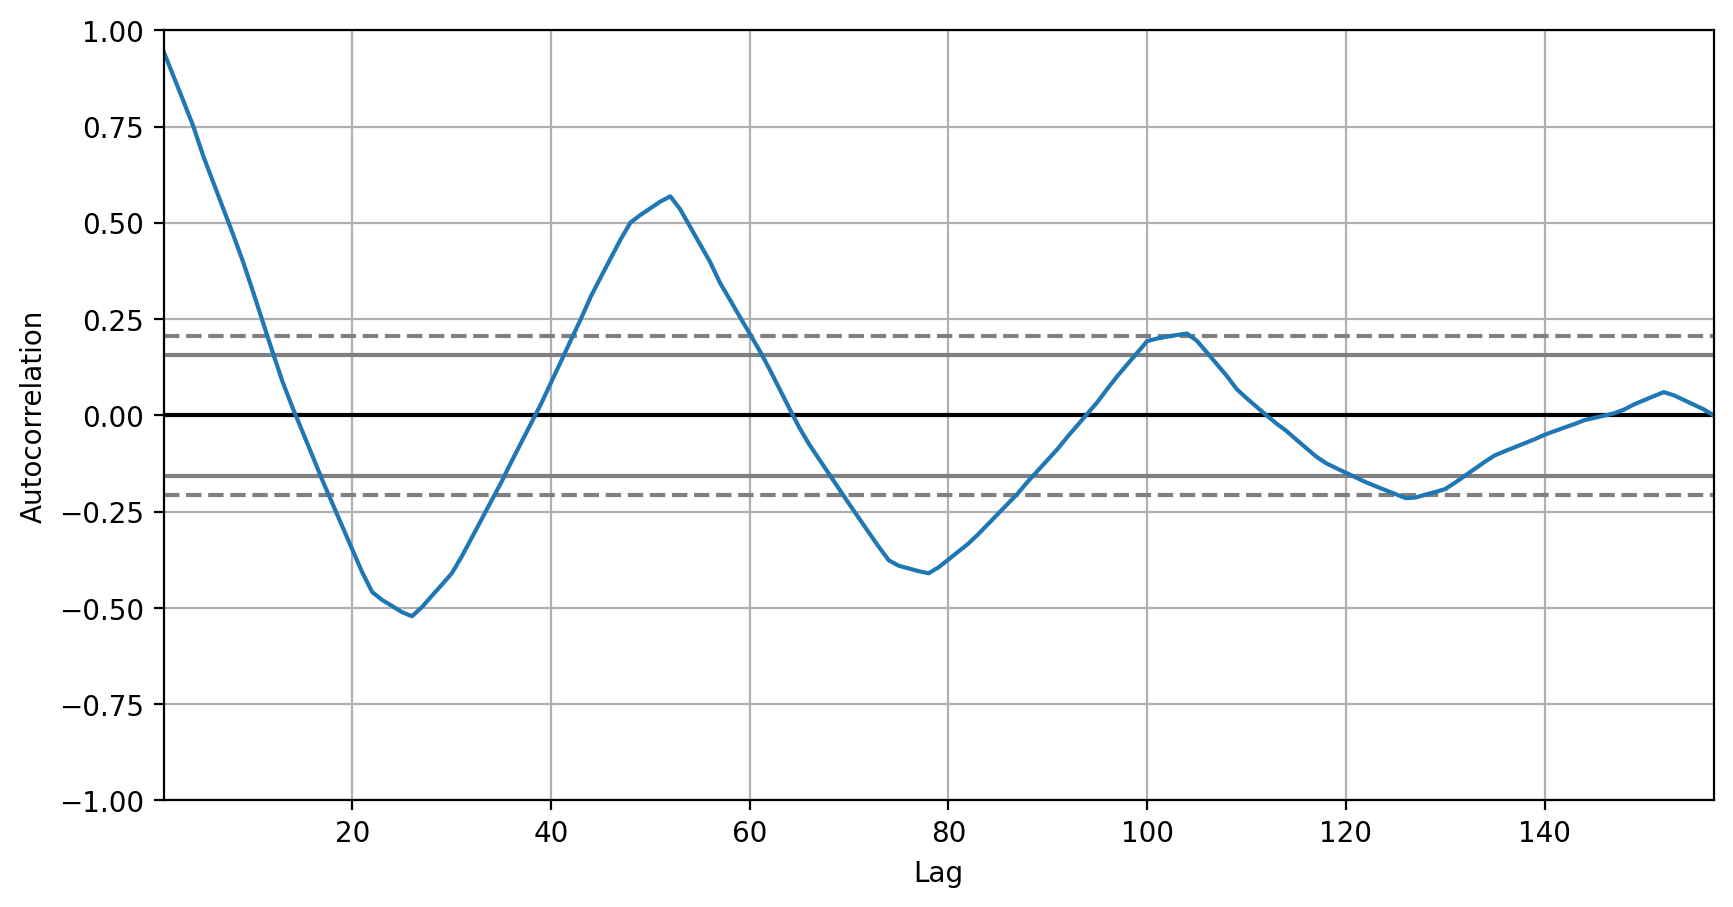

In [46]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())
plt.show()


## 9. Seasonal Decomposition

In [48]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)


In [49]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

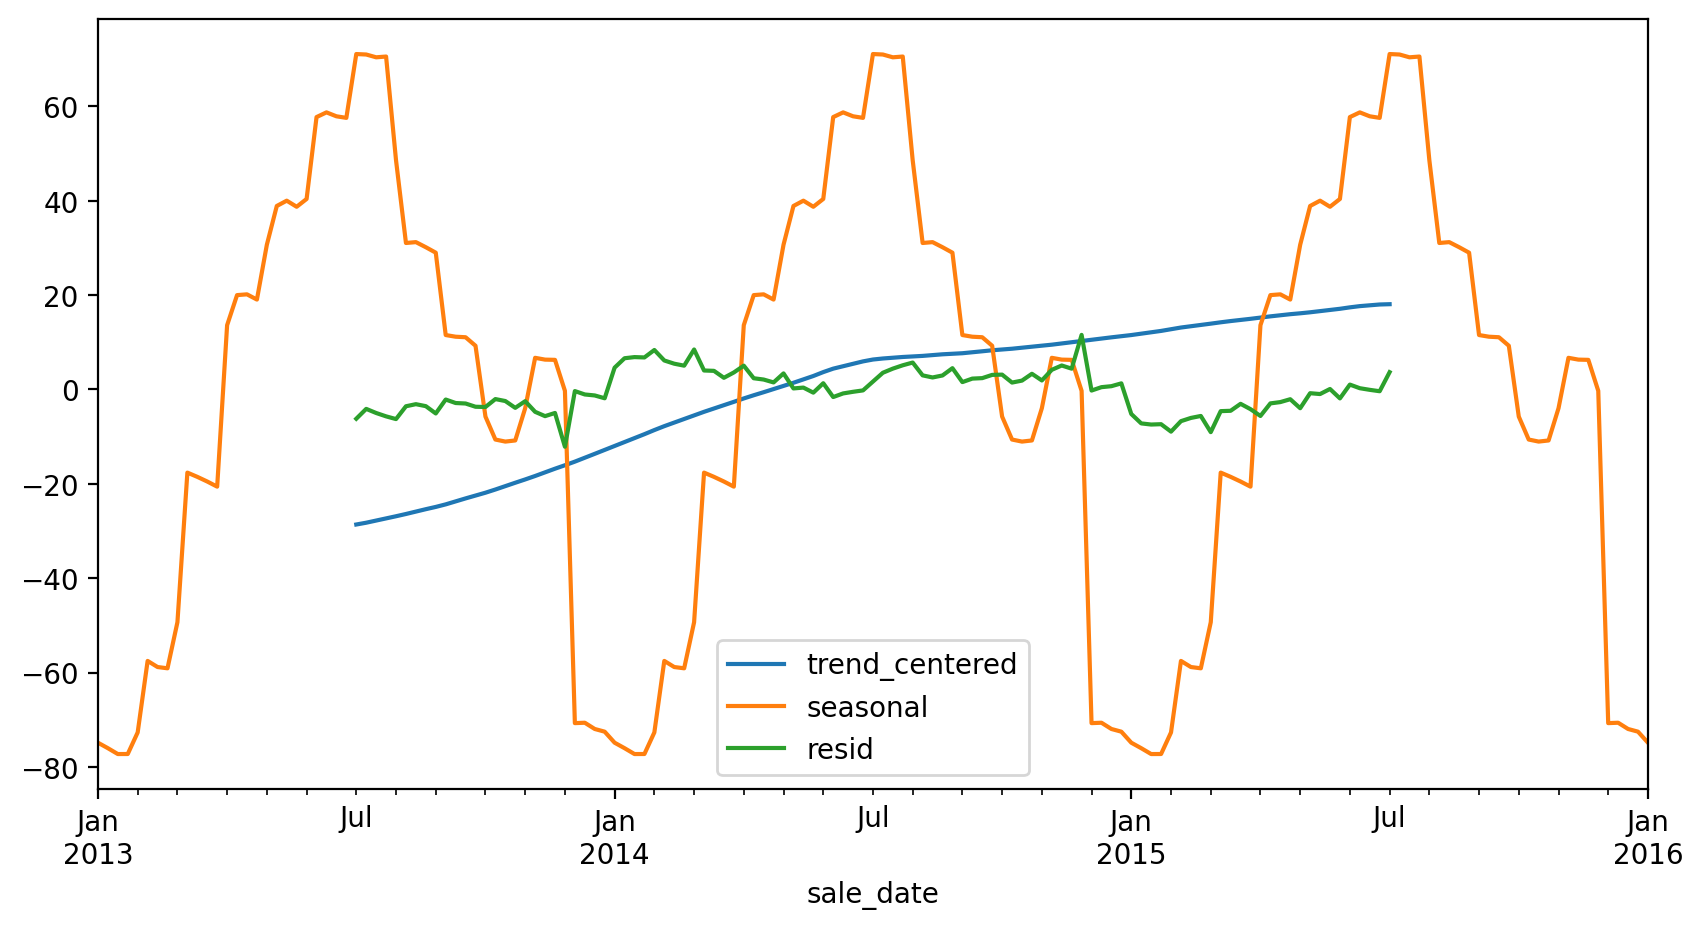

In [50]:
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

In [51]:
train = train.drop(columns=['y(t + 1)','weekday','day_num'])
train = train.resample('D').mean()
train

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_16544/3322013610.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train = train.resample('D').mean()


sale_id  store_id  item_id  sale_amount  item_id.1    item_upc14  \
sale_date                                                                       
2013-01-01  455588.0       5.5     25.5       27.392       25.5  2.384688e+11   
2013-01-02  455589.0       5.5     25.5       27.356       25.5  2.384688e+11   
2013-01-03  455590.0       5.5     25.5       28.976       25.5  2.384688e+11   
2013-01-04  455591.0       5.5     25.5       31.354       25.5  2.384688e+11   
2013-01-05  455592.0       5.5     25.5       32.474       25.5  2.384688e+11   
...              ...       ...      ...          ...        ...           ...   
2015-12-27  456678.0       5.5     25.5       46.536       25.5  2.384688e+11   
2015-12-28  456679.0       5.5     25.5       31.138       25.5  2.384688e+11   
2015-12-29  456680.0       5.5     25.5       36.806       25.5  2.384688e+11   
2015-12-30  456681.0       5.5     25.5       36.382       25.5  2.384688e+11   
2015-12-31  456682.0       5.5     25.5       38.754       25.5  2.384688e+11   

              item_upc12  item_price  store_id.1  store_zipcode  month  \
sale_date                                                                
2013-01-01  2.384688e+11      5.1604         5.5        78224.8    1.0   
2013-01-02  2.384688e+11      5.1604         5.5        78224.8    1.0   
2013-01-03  2.384688e+11      5.1604         5.5        78224.8    1.0   
2013-01-04  2.384688e+11      5.1604         5.5        78224.8    1.0   
2013-01-05  2.384688e+11      5.1604         5.5        78224.8    1.0   
...                  ...         ...         ...            ...    ...   
2015-12-27  2.384688e+11      5.1604         5.5        78224.8   12.0   
2015-12-28  2.384688e+11      5.1604         5.5        78224.8   12.0   
2015-12-29  2.384688e+11      5.1604         5.5        78224.8   12.0   
2015-12-30  2.384688e+11      5.1604         5.5        78224.8   12.0   
2015-12-31  2.384688e+11      5.1604         5.5        78224.8   12.0   

            day_of_week  sales_total  
sale_date                             
2013-01-01          1.0    147.68802  
2013-01-02          2.0    147.14116  
2013-01-03          3.0    156.33896  
2013-01-04          4.0    168.93546  
2013-01-05          5.0    175.24370  
...                 ...          ...  
2015-12-27          6.0    250.25172  
2015-12-28          0.0    168.59490  
2015-12-29          1.0    197.20550  
2015-12-30          2.0    195.54620  
2015-12-31          3.0    207.93884  

[1095 rows x 13 columns]

In [52]:
train['sales_bin'] = pd.qcut(train.sales_total, 5, labels=['low', 'mid-low', 'mid', 'mid-high', 'high'])
train.head()

sale_id  store_id  item_id  sale_amount  item_id.1    item_upc14  \
sale_date                                                                       
2013-01-01  455588.0       5.5     25.5       27.392       25.5  2.384688e+11   
2013-01-02  455589.0       5.5     25.5       27.356       25.5  2.384688e+11   
2013-01-03  455590.0       5.5     25.5       28.976       25.5  2.384688e+11   
2013-01-04  455591.0       5.5     25.5       31.354       25.5  2.384688e+11   
2013-01-05  455592.0       5.5     25.5       32.474       25.5  2.384688e+11   

              item_upc12  item_price  store_id.1  store_zipcode  month  \
sale_date                                                                
2013-01-01  2.384688e+11      5.1604         5.5        78224.8    1.0   
2013-01-02  2.384688e+11      5.1604         5.5        78224.8    1.0   
2013-01-03  2.384688e+11      5.1604         5.5        78224.8    1.0   
2013-01-04  2.384688e+11      5.1604         5.5        78224.8    1.0   
2013-01-05  2.384688e+11      5.1604         5.5        78224.8    1.0   

            day_of_week  sales_total sales_bin  
sale_date                                       
2013-01-01          1.0    147.68802       low  
2013-01-02          2.0    147.14116       low  
2013-01-03          3.0    156.33896       low  
2013-01-04          4.0    168.93546       low  
2013-01-05          5.0    175.24370       low

In [53]:
train.groupby('sales_bin').resample('M').size()

sales_bin  sale_date 
low        2013-01-31    31
           2013-02-28    24
           2013-03-31    12
           2013-04-30     5
           2013-05-31     0
                         ..
high       2015-07-31    27
           2015-08-31    15
           2015-09-30     8
           2015-10-31     4
           2015-11-30     9
Length: 168, dtype: int64

In [54]:
train.groupby('sales_bin').mean()

sale_id  store_id  item_id  sale_amount  item_id.1  \
sales_bin                                                             
low        455982.410959       5.5     25.5    32.870639       25.5   
mid-low    456095.301370       5.5     25.5    41.637626       25.5   
mid        456133.232877       5.5     25.5    48.470977       25.5   
mid-high   456176.456621       5.5     25.5    55.032740       25.5   
high       456287.598174       5.5     25.5    65.034703       25.5   

             item_upc14    item_upc12  item_price  store_id.1  store_zipcode  \
sales_bin                                                                      
low        2.384688e+11  2.384688e+11      5.1604         5.5        78224.8   
mid-low    2.384688e+11  2.384688e+11      5.1604         5.5        78224.8   
mid        2.384688e+11  2.384688e+11      5.1604         5.5        78224.8   
mid-high   2.384688e+11  2.384688e+11      5.1604         5.5        78224.8   
high       2.384688e+11  2.384688e+11      5.1604         5.5        78224.8   

              month  day_of_week  sales_total  
sales_bin                                      
low        4.881279     1.748858   176.753488  
mid-low    6.383562     2.447489   223.864215  
mid        7.337900     2.566210   260.576261  
mid-high   7.031963     3.502283   295.914101  
high       6.995434     4.721461   349.640415

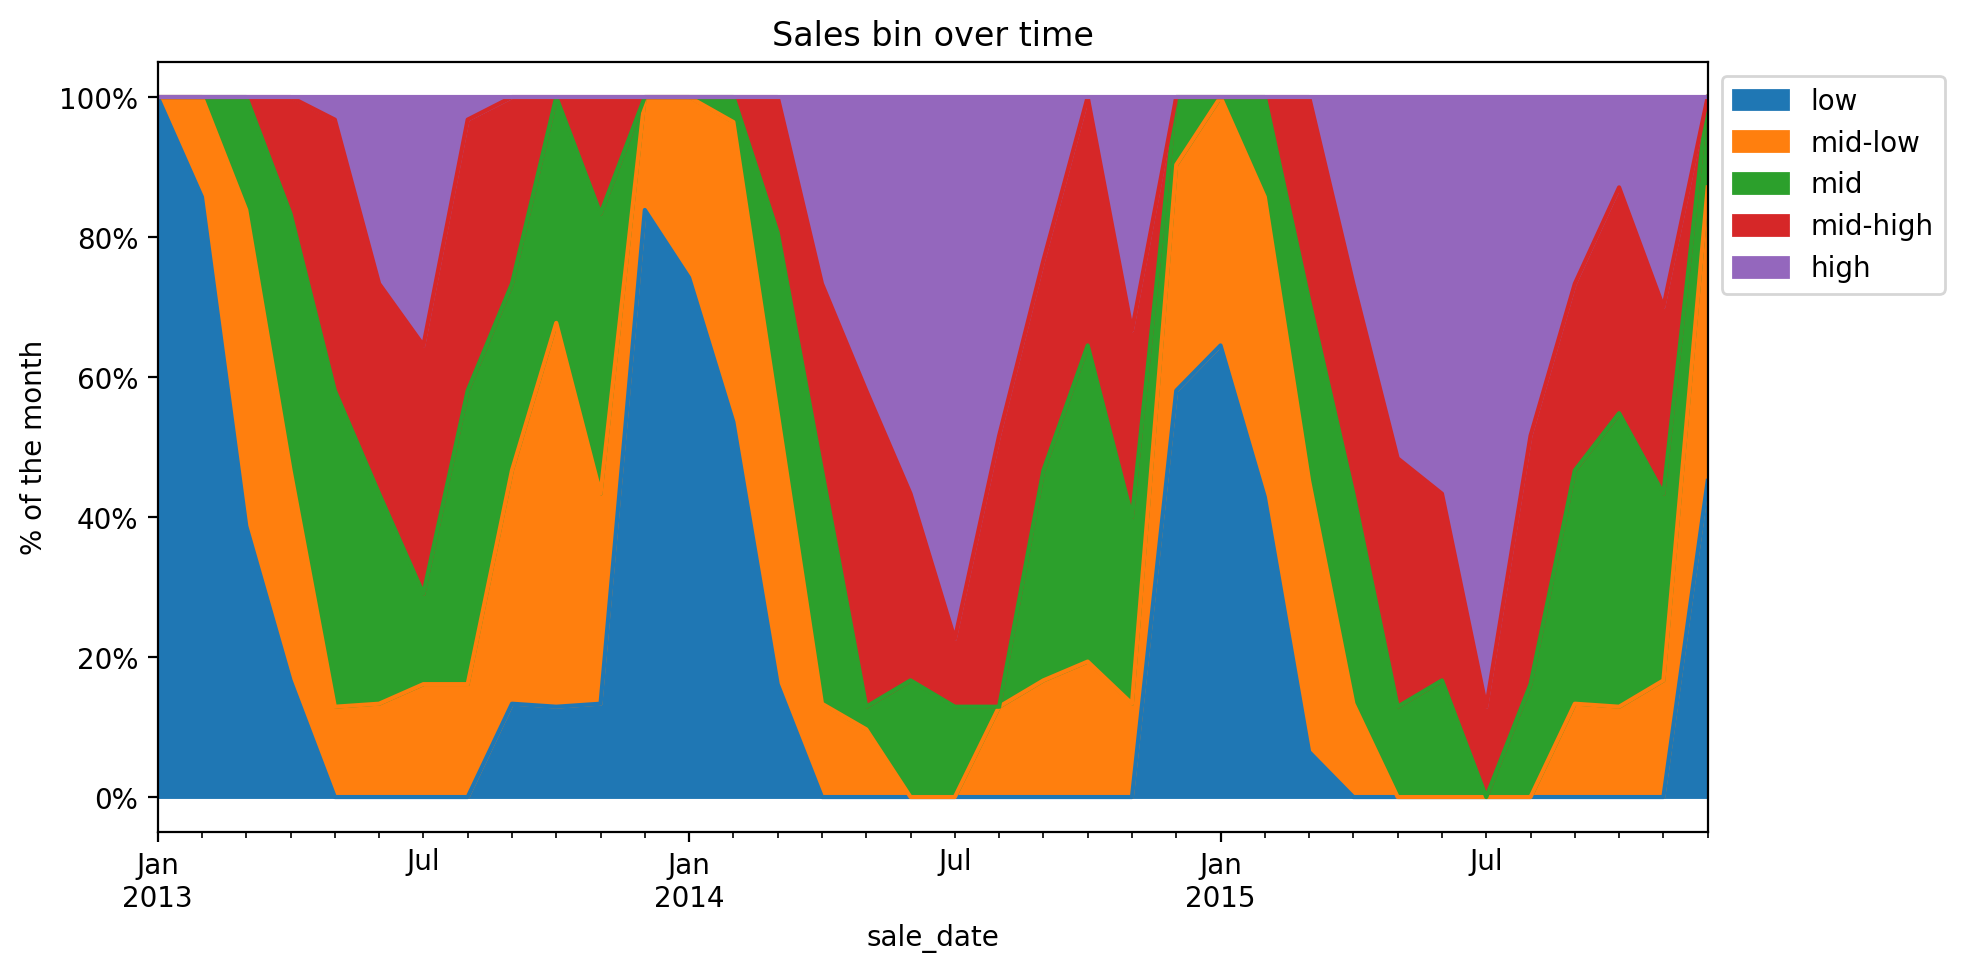

In [55]:
ax = (train.groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area(title='Sales bin over time', ylabel='% of the month'))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.yaxis.set_major_formatter('{:.0%}'.format)

# Germany Data Exploration

In [3]:
df_germ = prepare_germany()
df_germ.head()

Consumption        Wind      Solar  Wind+Solar  month  year
Date                                                                   
2006-01-01     1069.184  164.814173  89.258695  272.663481      1  2006
2006-01-02     1380.521  164.814173  89.258695  272.663481      1  2006
2006-01-03     1442.533  164.814173  89.258695  272.663481      1  2006
2006-01-04     1457.217  164.814173  89.258695  272.663481      1  2006
2006-01-05     1477.131  164.814173  89.258695  272.663481      1  2006

In [56]:
df_germ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         4383 non-null   float64
 2   Solar        4383 non-null   float64
 3   Wind+Solar   4383 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


In [58]:
df_germ.shape

(4383, 6)

## Split data by years

In [59]:
print('Date Range:', df_germ.index.min(), 'to', df_germ.index.max())

Date Range: 2006-01-01 00:00:00 to 2017-12-31 00:00:00


In [60]:
train = df_germ.loc[:'2015'].copy()
validate = df_germ.loc['2016'].copy()
test = df_germ.loc['2017'].copy()

In [61]:
train.shape

(3652, 6)

In [62]:
validate.shape

(366, 6)

In [63]:
test.shape

(365, 6)

## 1. Visualize target variable

In [65]:
y = train.Consumption
y.head()

Date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: Consumption, dtype: float64

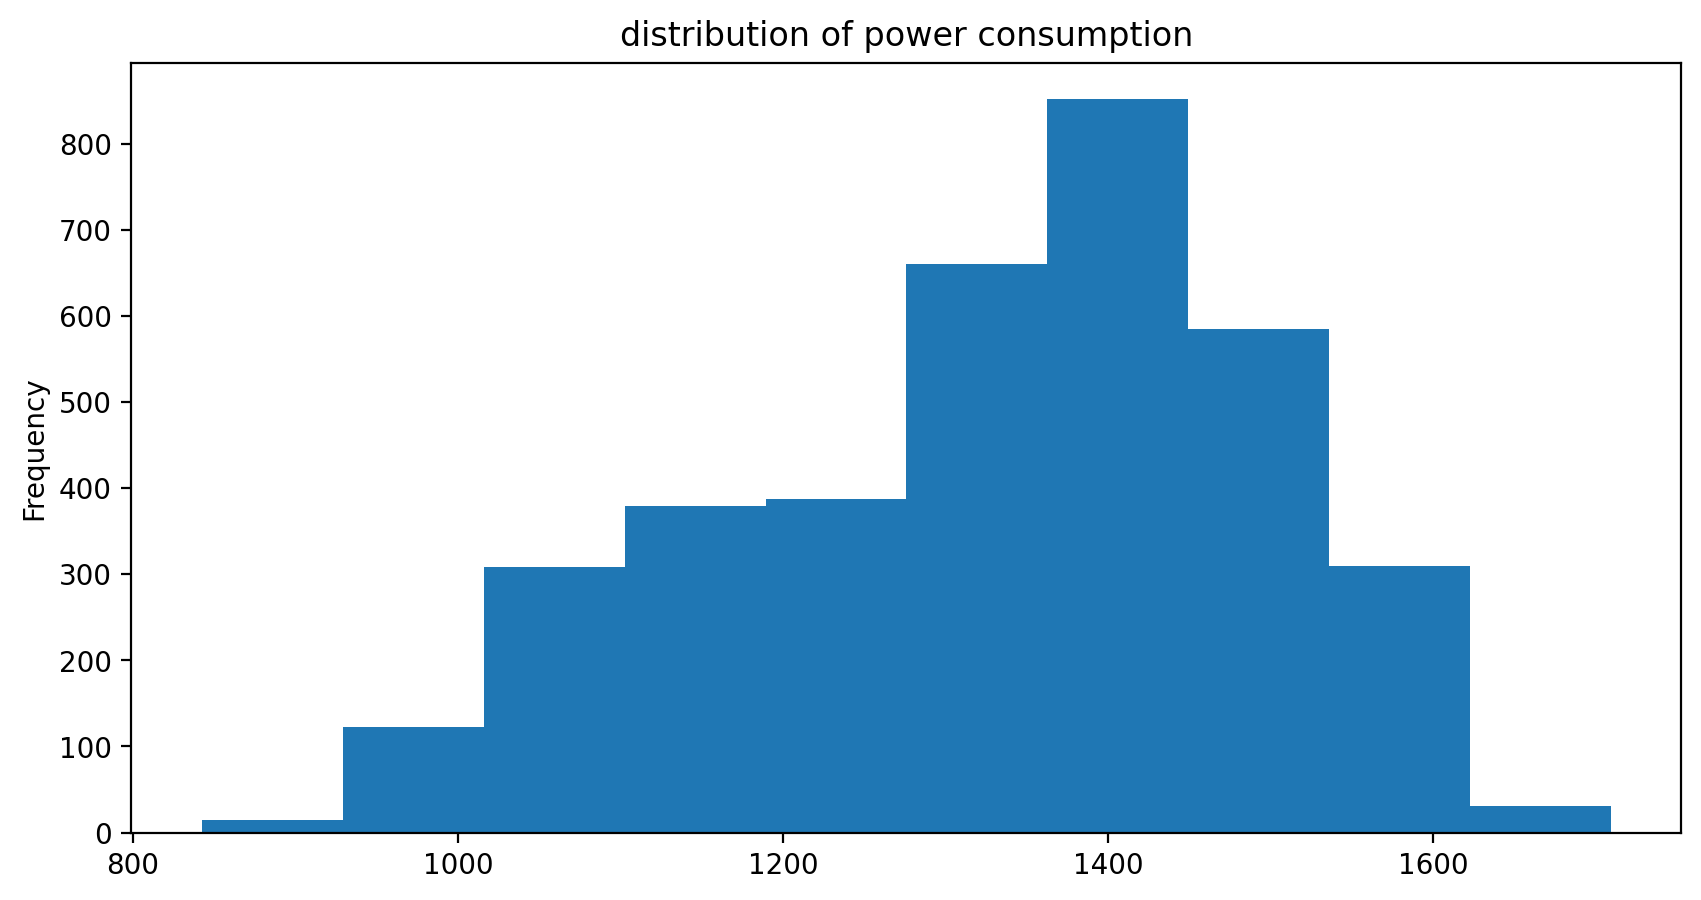

In [64]:
train.Consumption.plot.hist()
plt.title('distribution of power consumption')
plt.show()

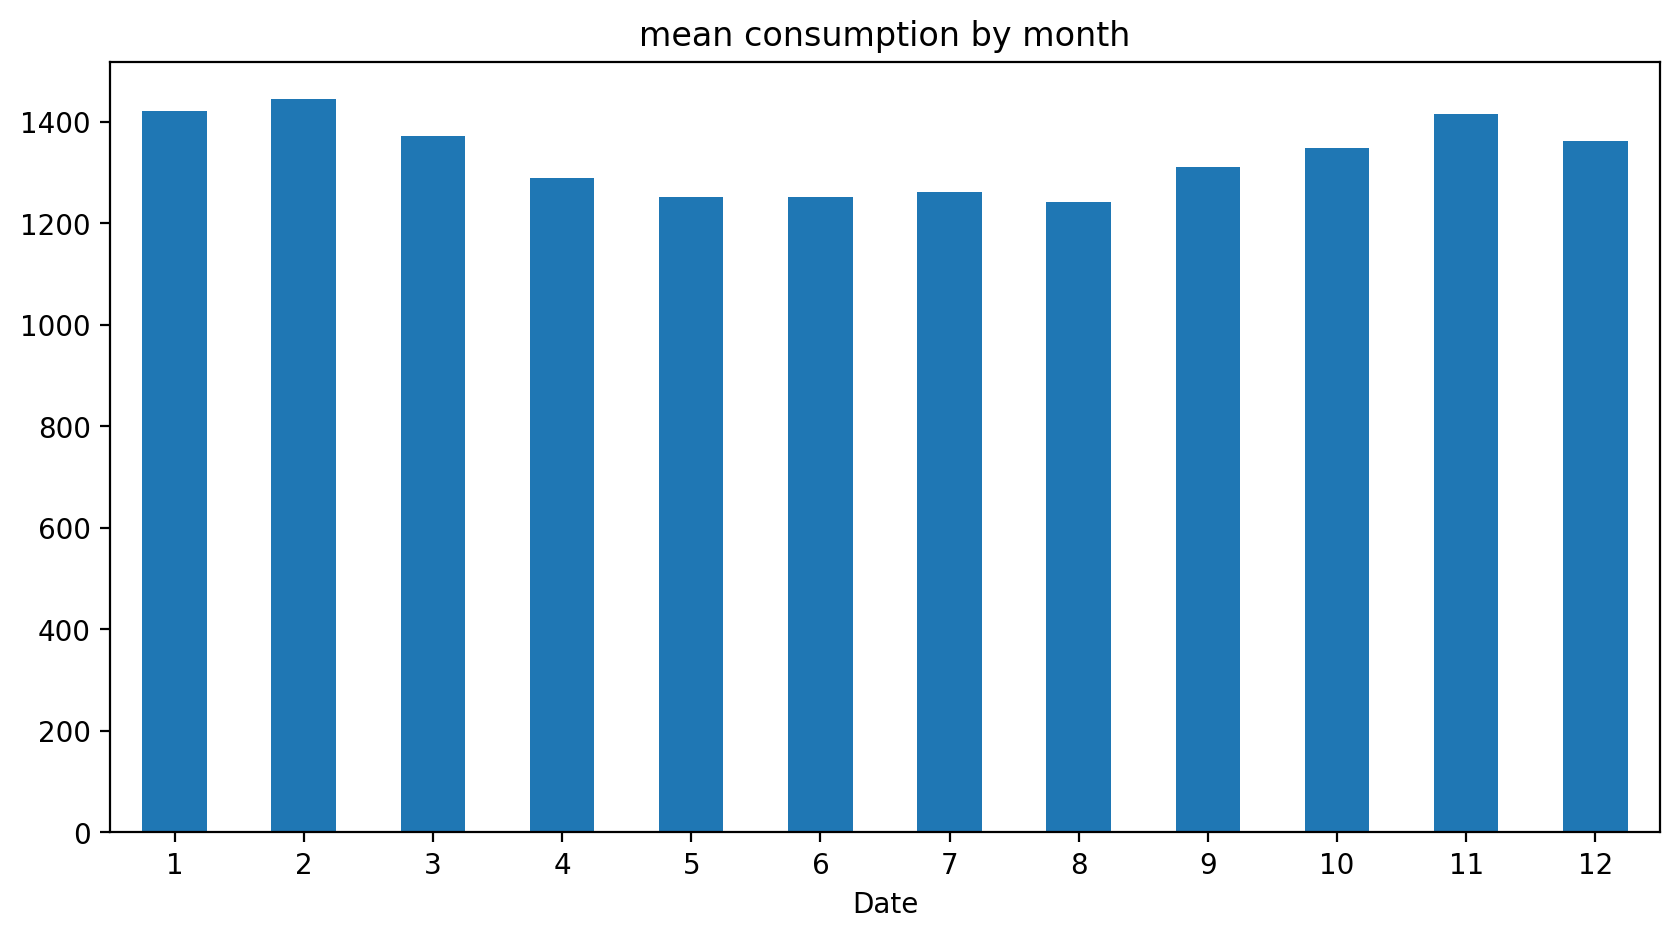

In [66]:
train.groupby(train.index.month).Consumption.mean()\
.plot.bar().tick_params('x', rotation=0)

plt.title('mean consumption by month')
plt.show()

In [68]:
train['weekday'] = train.index.day_name()
train['day_num'] = train.index.day_of_week
train.head()

Consumption        Wind      Solar  Wind+Solar  month  year  \
Date                                                                      
2006-01-01     1069.184  164.814173  89.258695  272.663481      1  2006   
2006-01-02     1380.521  164.814173  89.258695  272.663481      1  2006   
2006-01-03     1442.533  164.814173  89.258695  272.663481      1  2006   
2006-01-04     1457.217  164.814173  89.258695  272.663481      1  2006   
2006-01-05     1477.131  164.814173  89.258695  272.663481      1  2006   

              weekday  day_num  
Date                            
2006-01-01     Sunday        6  
2006-01-02     Monday        0  
2006-01-03    Tuesday        1  
2006-01-04  Wednesday        2  
2006-01-05   Thursday        3

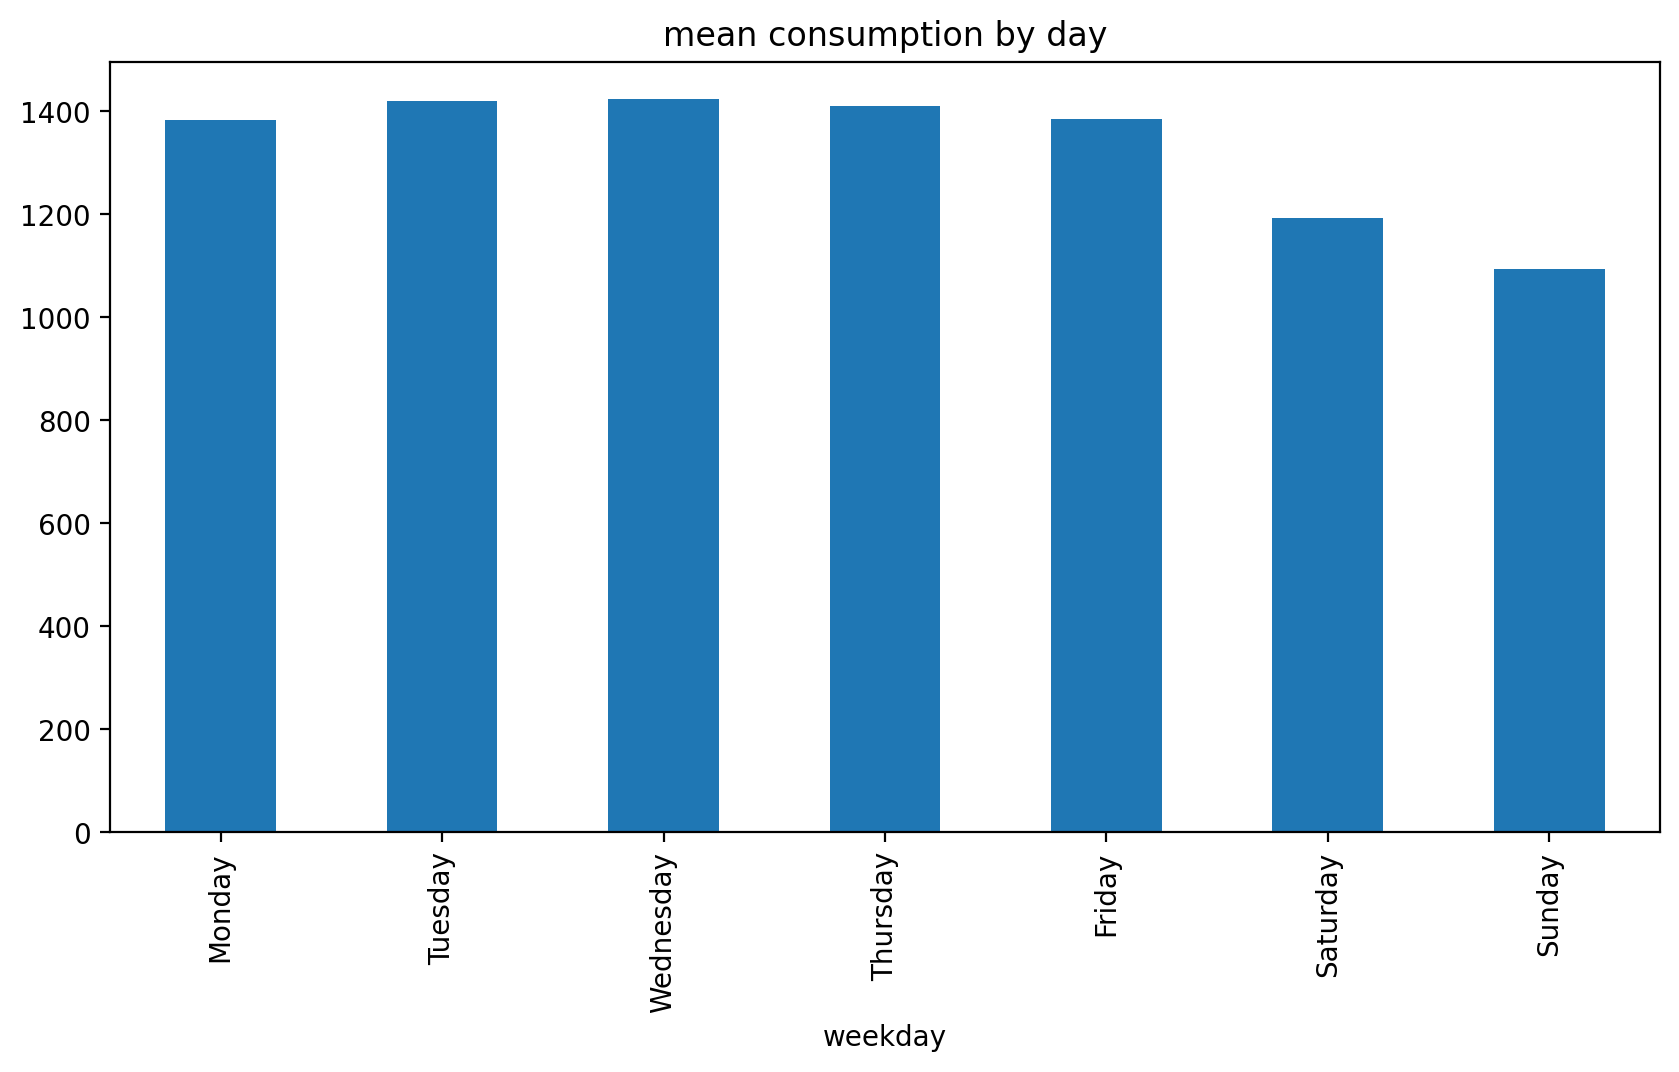

In [69]:
train.groupby('weekday').mean().sort_values('day_num').Consumption.plot.bar()

plt.title('mean consumption by day')
plt.show()

## 2. target over time

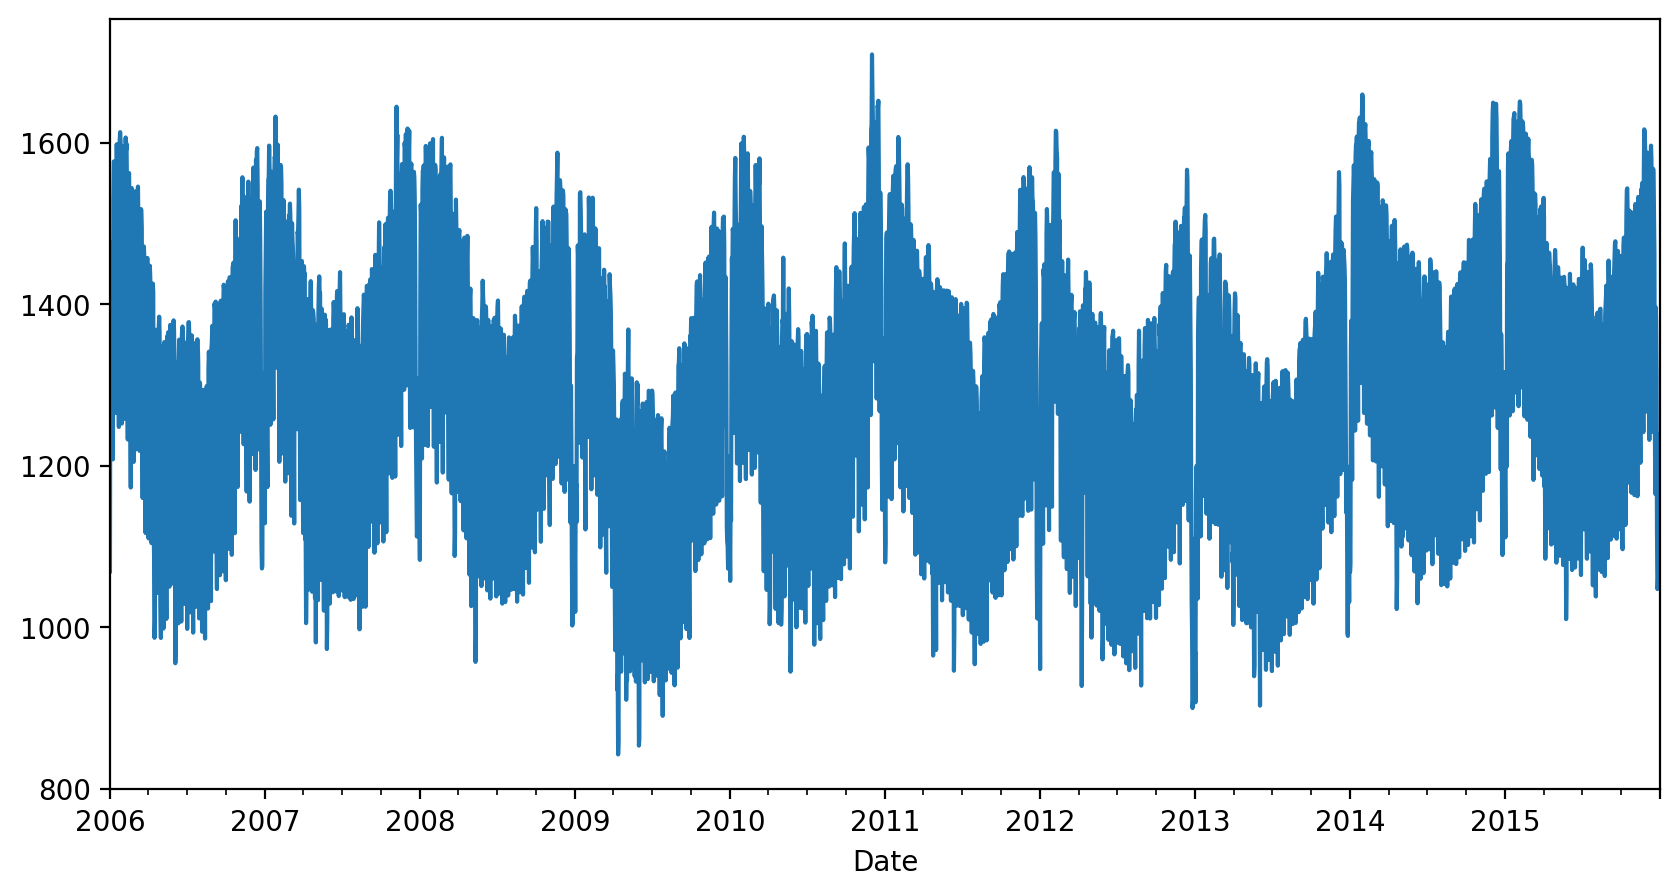

In [70]:
y.plot();

## 3. target average of periods of time

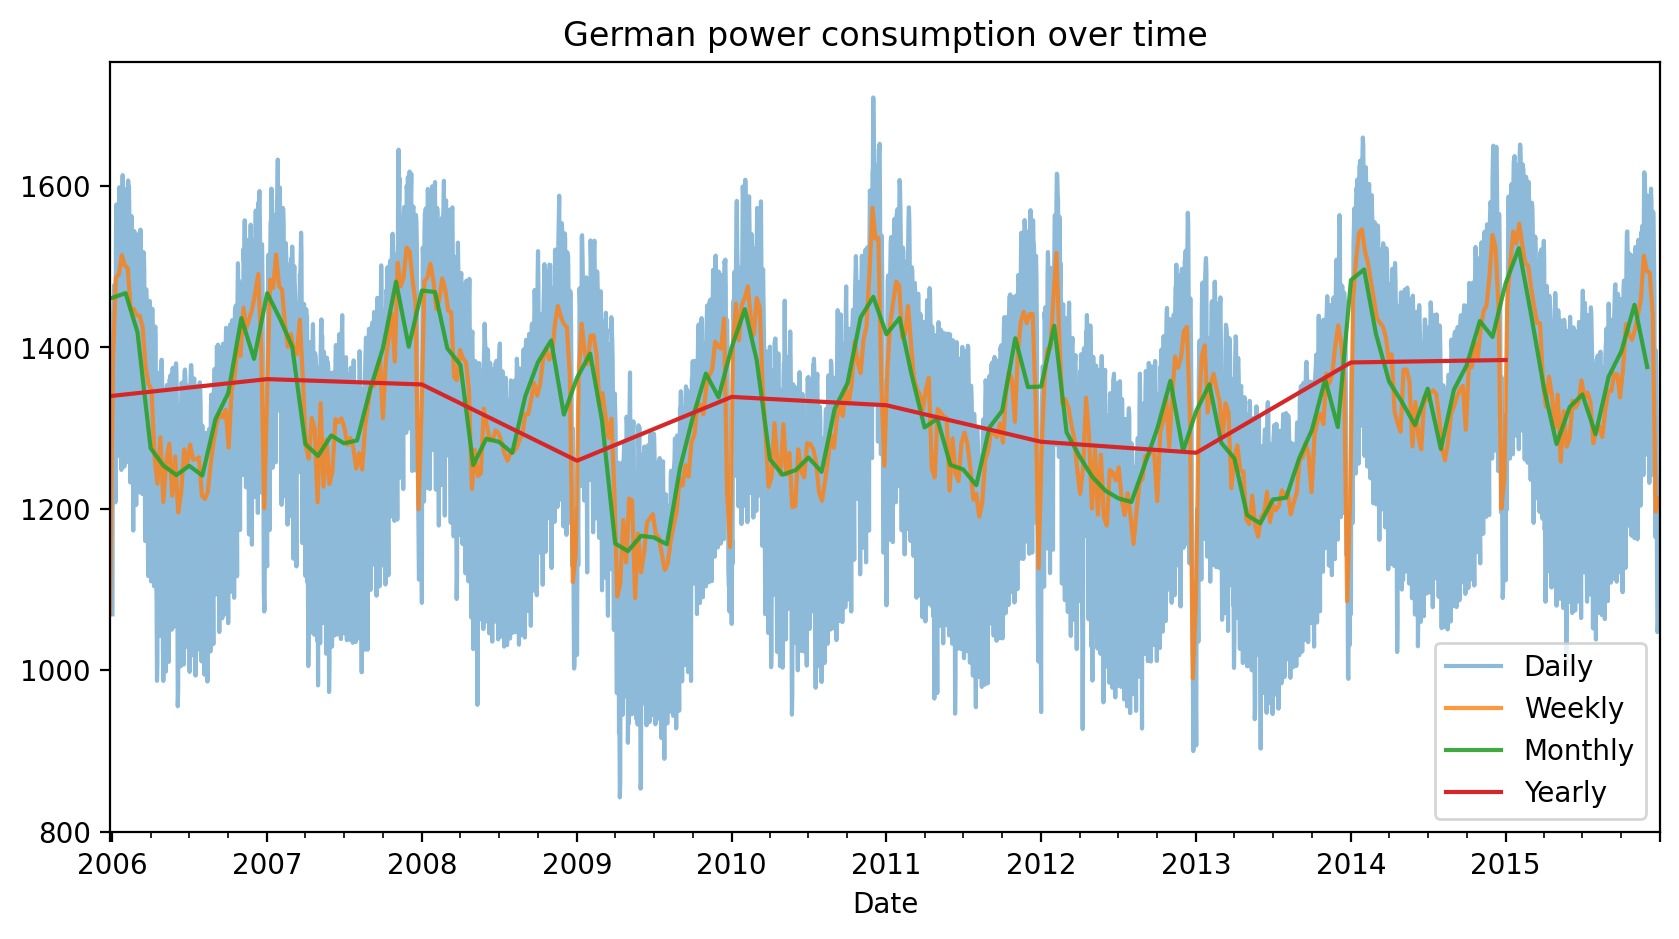

In [71]:
y.resample('D').mean().plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(alpha=0.9, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')

plt.title('German power consumption over time')
plt.legend()
plt.show()

## target change over time

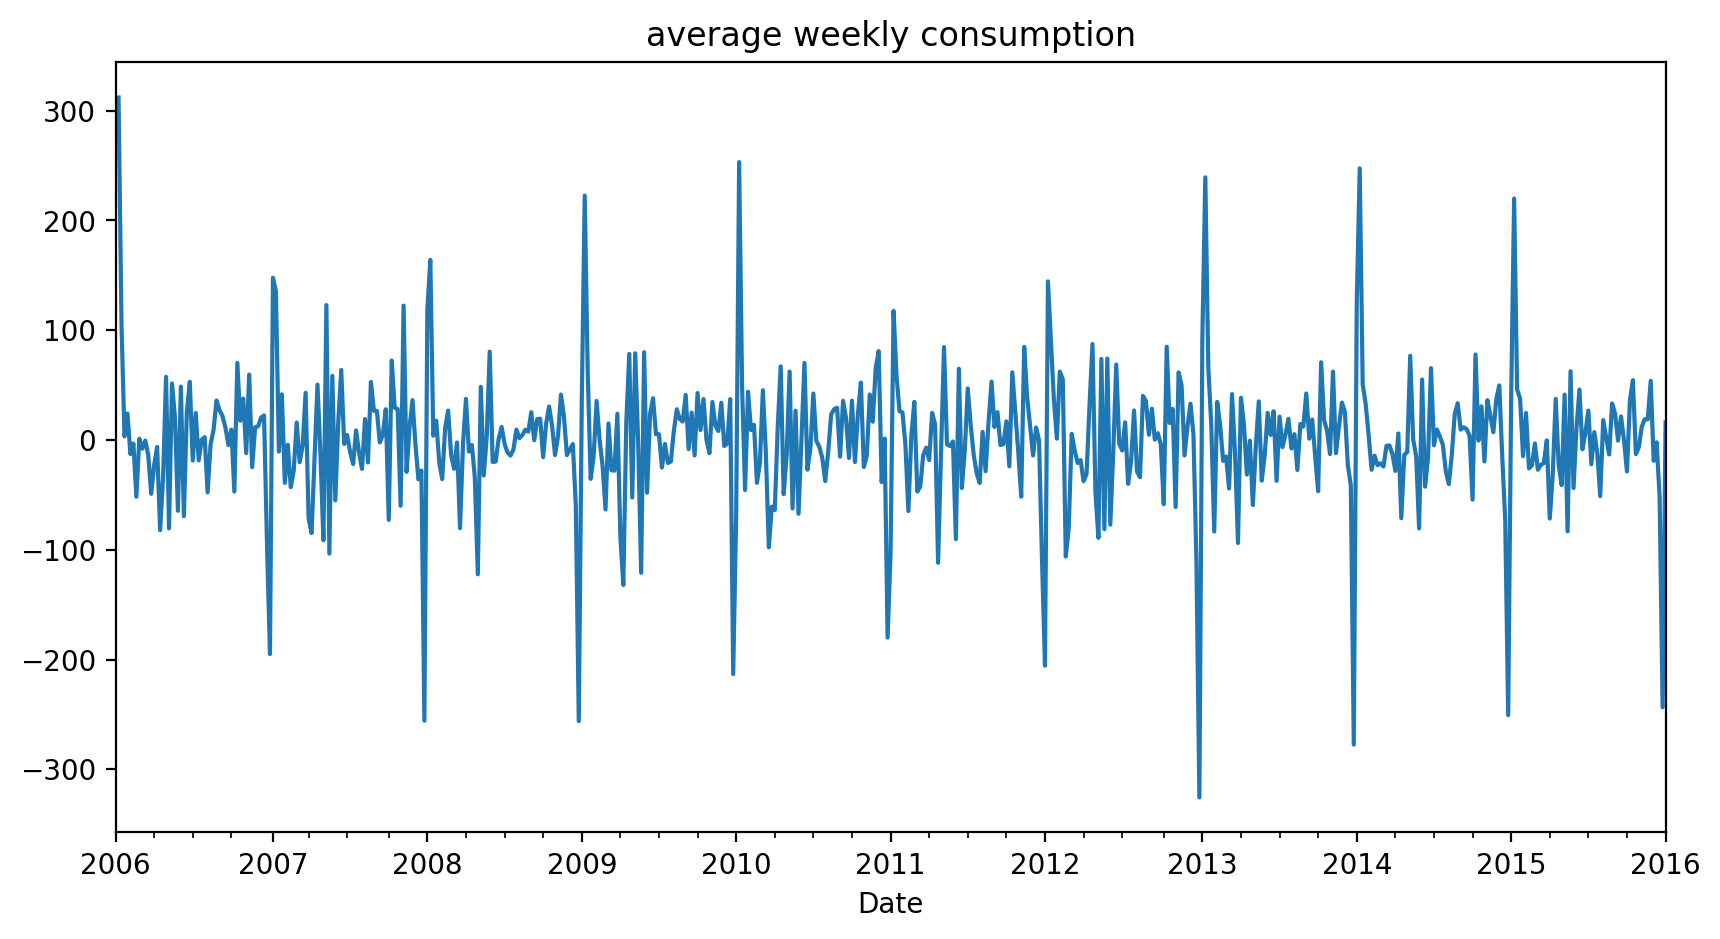

In [72]:
y.resample('W').mean().diff().plot(title='average weekly consumption');

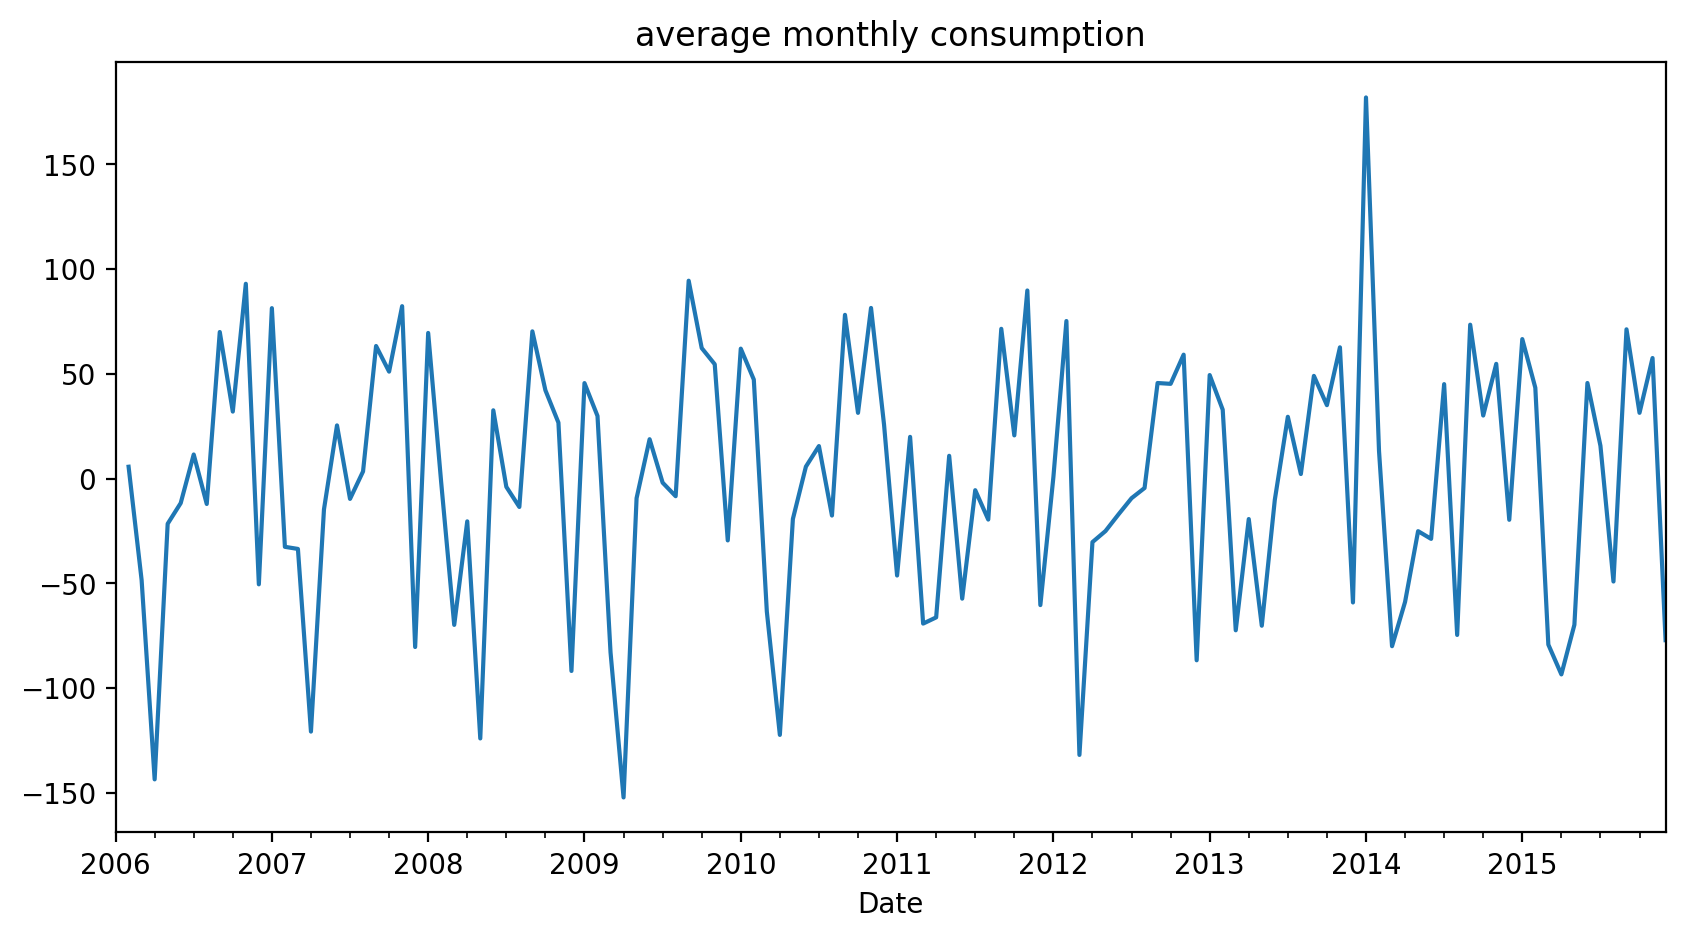

In [73]:
y.resample('M').mean().diff().plot(title='average monthly consumption');

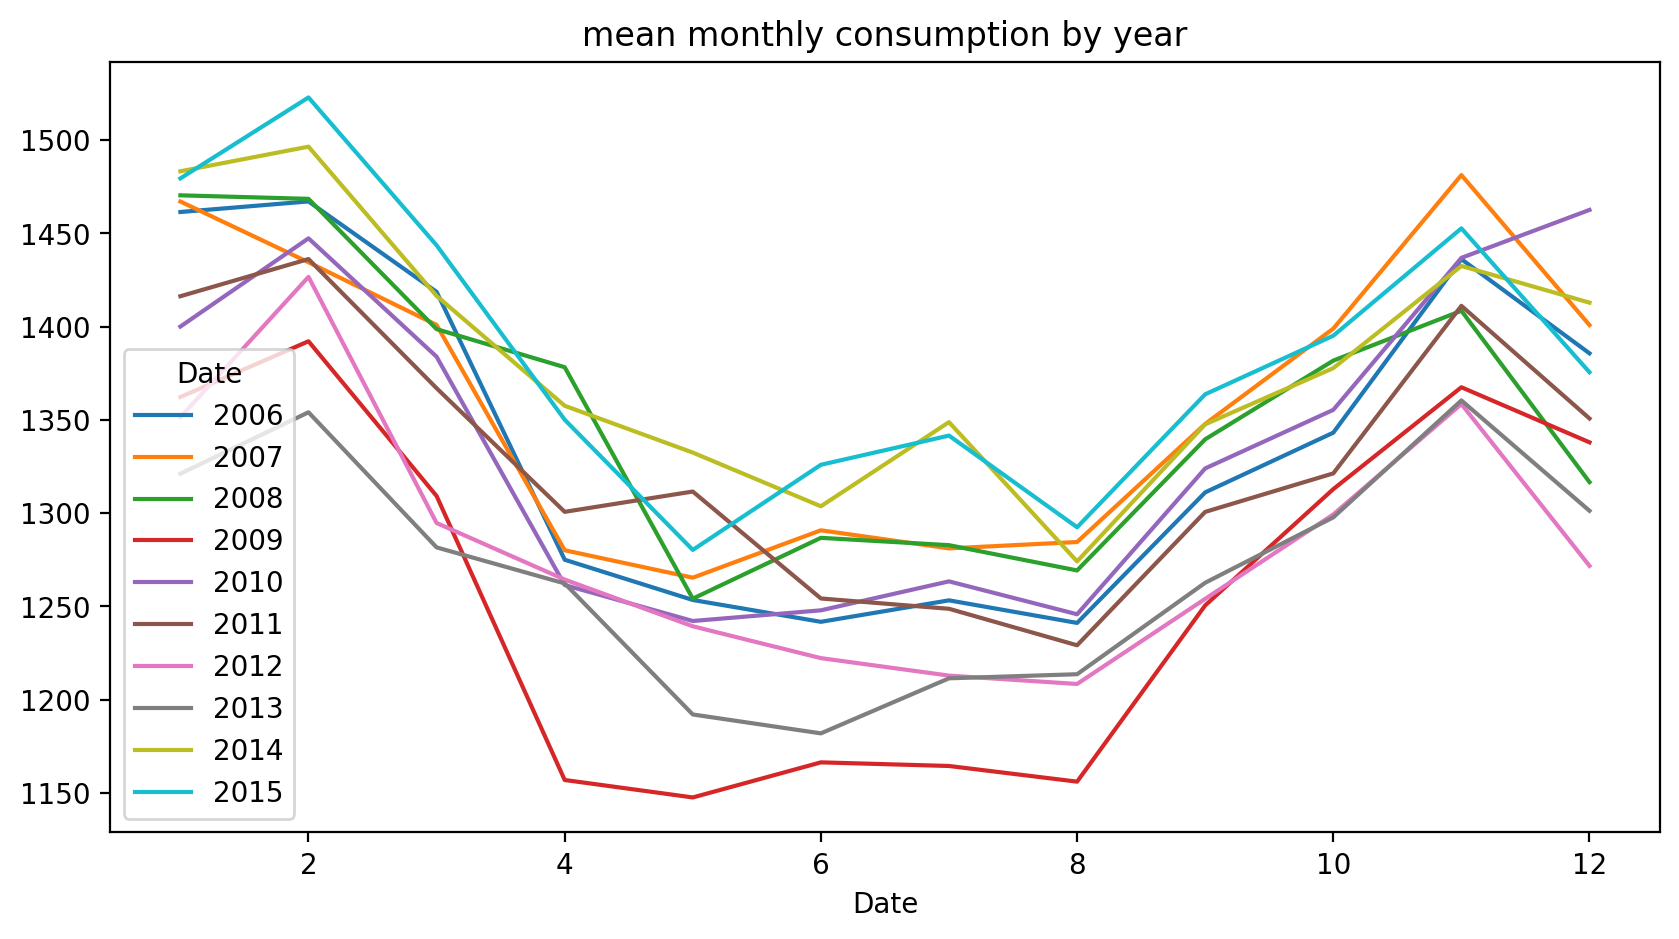

In [74]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.title('mean monthly consumption by year')
plt.show()

## 6. Seasonal subseries plot

In [75]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

Date           1            2            3            4            5   \
Date                                                                    
2006  1461.442065  1467.106893  1418.649161  1275.058900  1253.488484   
2007  1467.058032  1434.484357  1400.909871  1280.133167  1265.436000   
2008  1470.373484  1468.486207  1398.653258  1378.243233  1254.194226   
2009  1362.255613  1392.155179  1309.222387  1157.006367  1147.650742   
2010  1400.041677  1447.322536  1383.865226  1261.505467  1242.220129   
2011  1416.290581  1436.212607  1366.989516  1300.732300  1311.608290   
2012  1351.441226  1426.666241  1294.748258  1264.427000  1239.388710   
2013  1321.194935  1354.087429  1281.671581  1262.359967  1192.123032   
2014  1483.261323  1496.465536  1416.458355  1357.582700  1332.490710   
2015  1479.451968  1522.838964  1443.586774  1350.108400  1280.312677   

Date           6            7            8            9            10  \
Date                                                                    
2006  1241.781667  1253.296290  1241.188774  1311.169933  1343.161903   
2007  1290.828733  1281.134258  1284.554355  1347.857500  1398.924581   
2008  1286.797100  1282.866355  1269.323484  1339.615433  1381.788323   
2009  1166.456833  1164.515871  1156.114645  1250.585967  1312.905000   
2010  1247.938433  1263.467452  1245.832323  1324.003533  1355.390839   
2011  1254.294333  1248.768194  1229.204935  1300.706833  1321.337484   
2012  1222.315667  1212.953710  1208.466258  1254.097633  1299.330355   
2013  1181.999000  1211.503484  1213.691355  1262.723900  1297.771387   
2014  1303.712233  1348.810258  1274.170968  1347.642400  1377.754355   
2015  1325.948067  1341.598968  1292.465581  1363.728767  1395.132194   

Date           11           12  
Date                            
2006  1436.164133  1385.686355  
2007  1481.237600  1400.840161  
2008  1408.506233  1316.669129  
2009  1367.505100  1337.995581  
2010  1436.854833  1462.556581  
2011  1411.144733  1350.761871  
2012  1358.505700  1271.769968  
2013  1360.433367  1301.299645  
2014  1432.526667  1412.856161  
2015  1452.687033  1375.545516

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_16544/1931033735.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ax, (month, subset) in zip(axs, table.iteritems()):


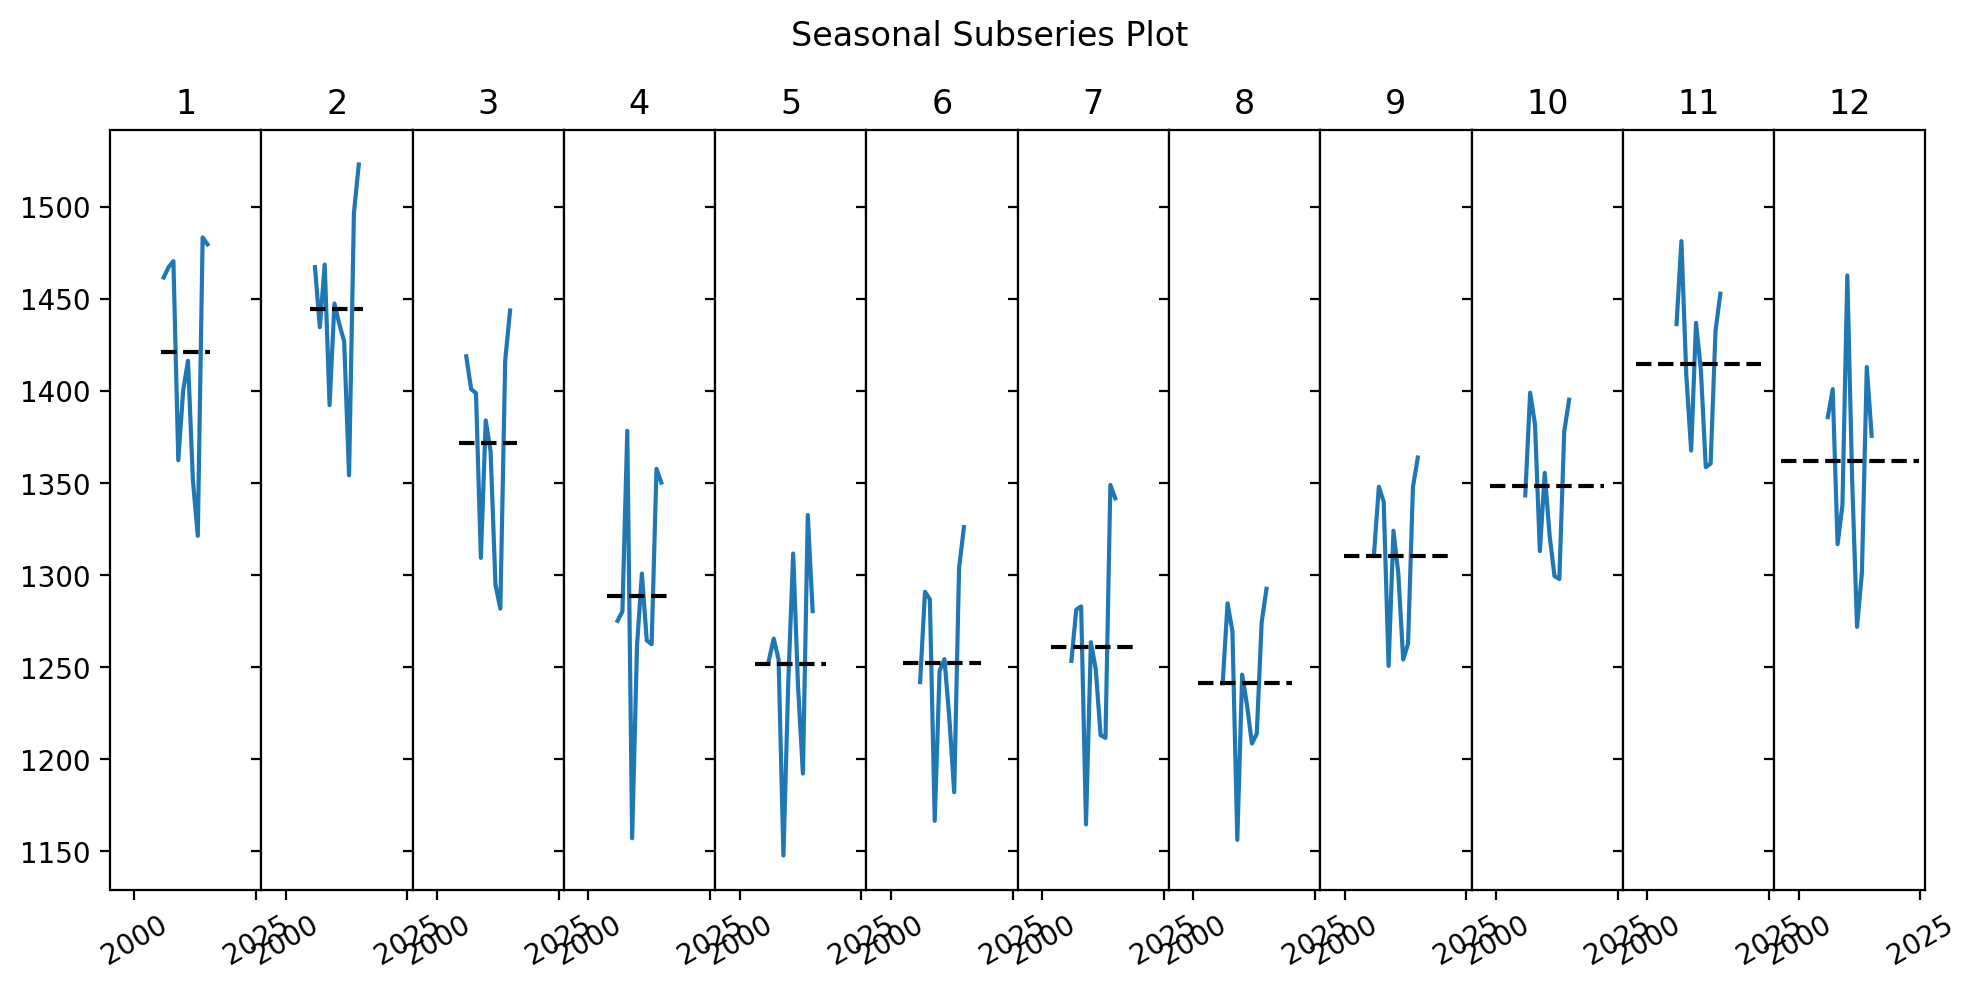

In [76]:
# unpacking my figure and axes elements
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)


In [77]:
train['y(t + 1)'] = train.Consumption.shift(-1)
train.head()

Consumption        Wind      Solar  Wind+Solar  month  year  \
Date                                                                      
2006-01-01     1069.184  164.814173  89.258695  272.663481      1  2006   
2006-01-02     1380.521  164.814173  89.258695  272.663481      1  2006   
2006-01-03     1442.533  164.814173  89.258695  272.663481      1  2006   
2006-01-04     1457.217  164.814173  89.258695  272.663481      1  2006   
2006-01-05     1477.131  164.814173  89.258695  272.663481      1  2006   

              weekday  day_num  y(t + 1)  
Date                                      
2006-01-01     Sunday        6  1380.521  
2006-01-02     Monday        0  1442.533  
2006-01-03    Tuesday        1  1457.217  
2006-01-04  Wednesday        2  1477.131  
2006-01-05   Thursday        3  1403.427

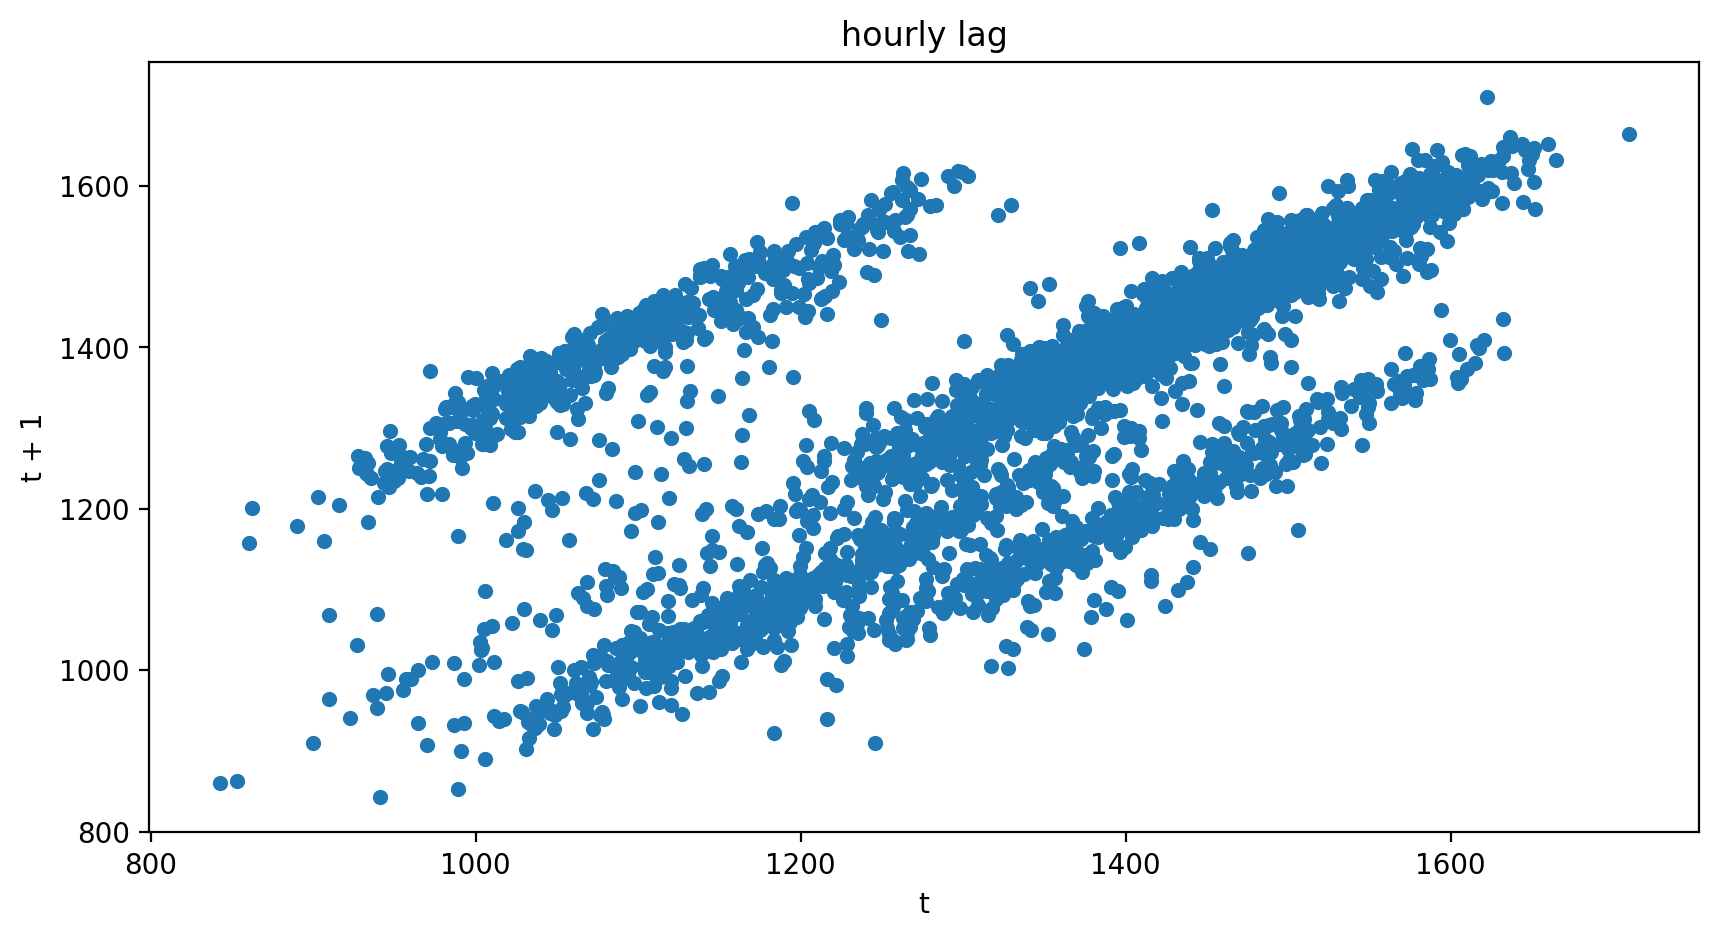

In [78]:
train.plot.scatter(x='Consumption', y='y(t + 1)').set(xlabel='t', ylabel='t + 1')
plt.title('hourly lag')
plt.show()

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_16544/847318764.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly = train.resample('W').mean().drop(columns='y(t + 1)')


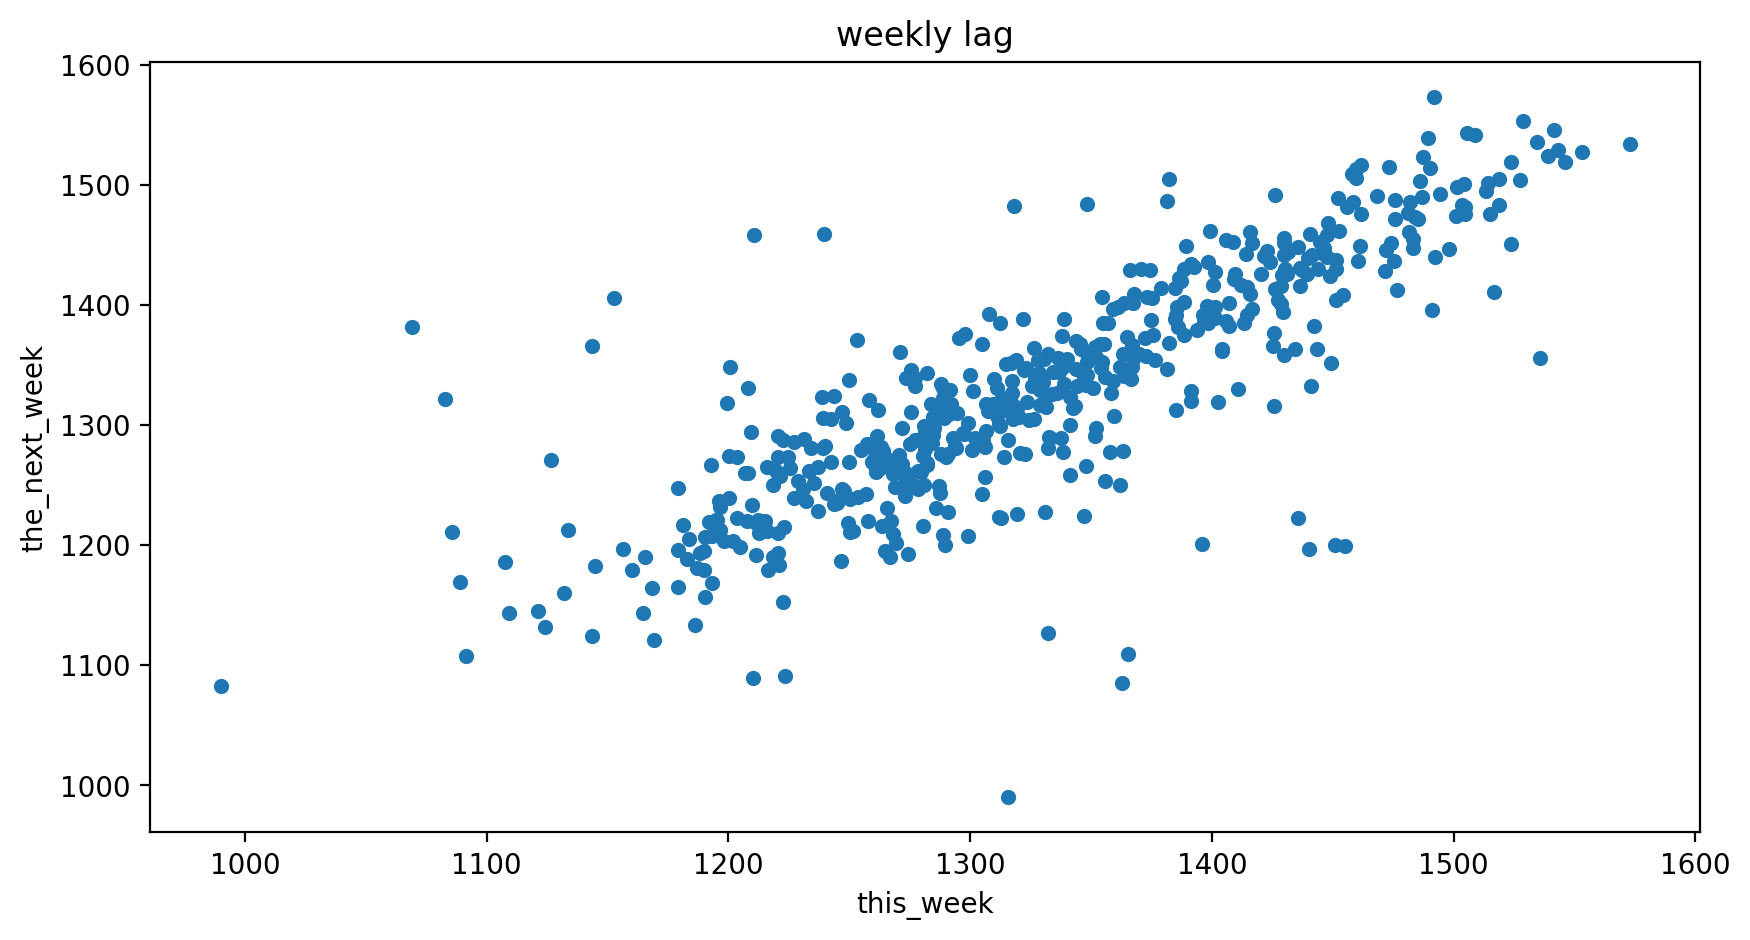

In [80]:
weekly = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['the_next_week'] = weekly.Consumption.shift(-1)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
plt.title('weekly lag')
plt.show()

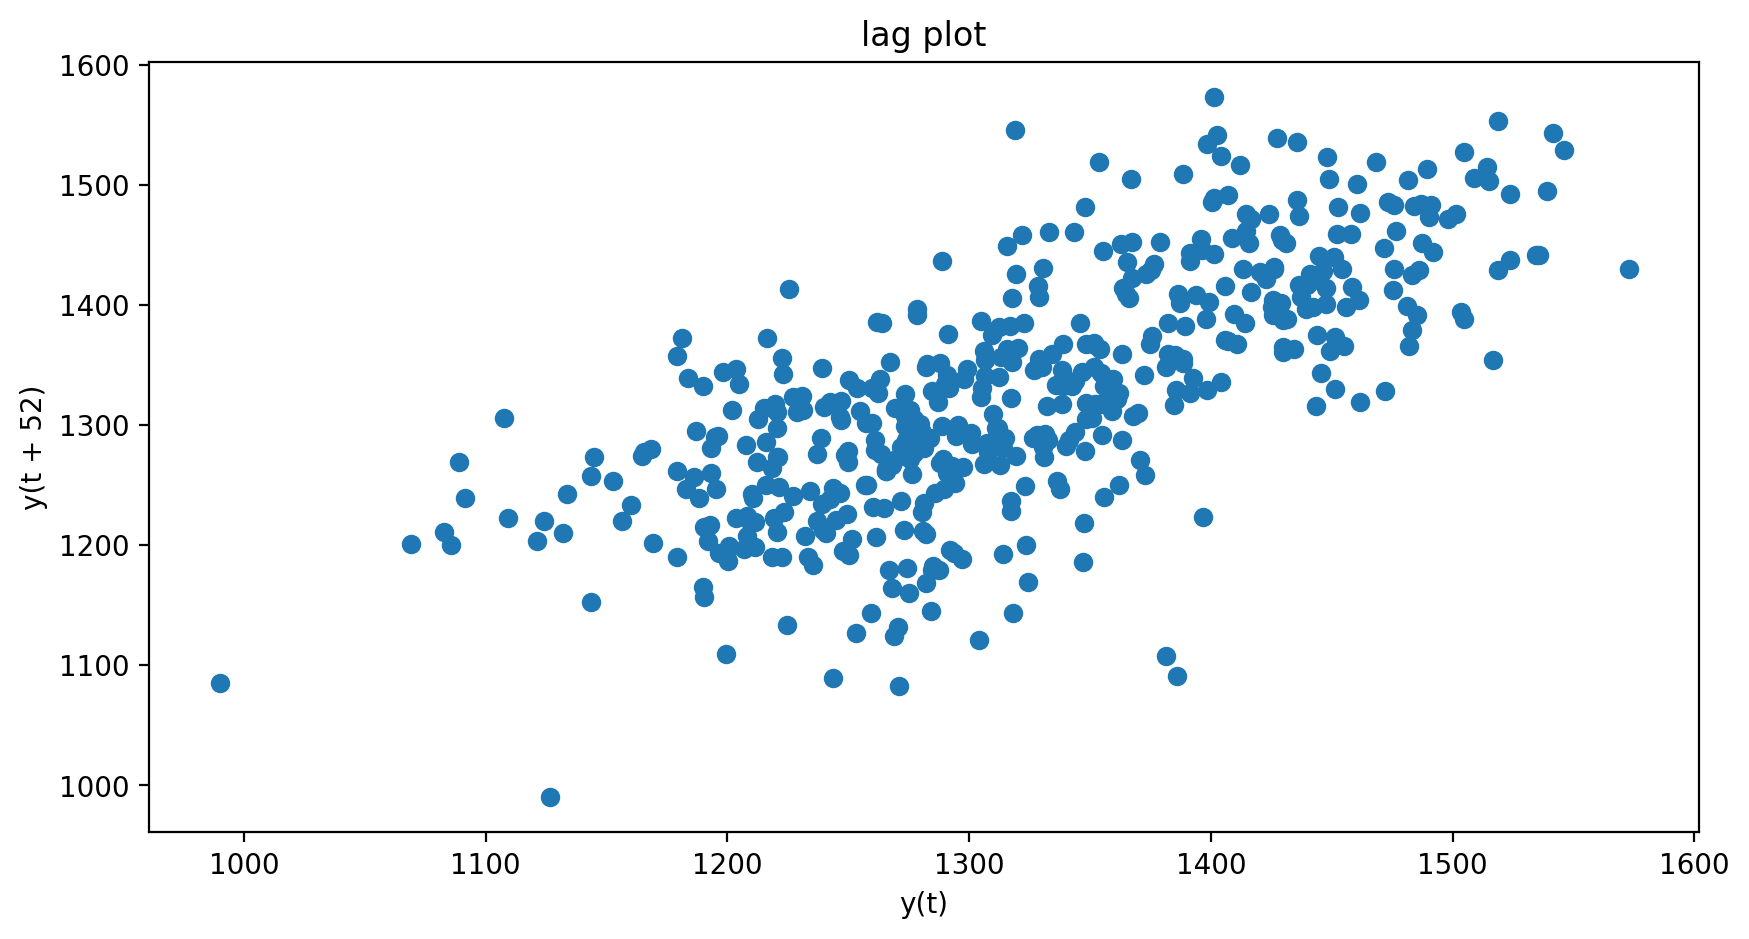

In [81]:
# 52 weeks
pd.plotting.lag_plot(train.Consumption.resample('W').mean(), lag=52)
plt.title('lag plot');

## 8. Autocorrelation Plot

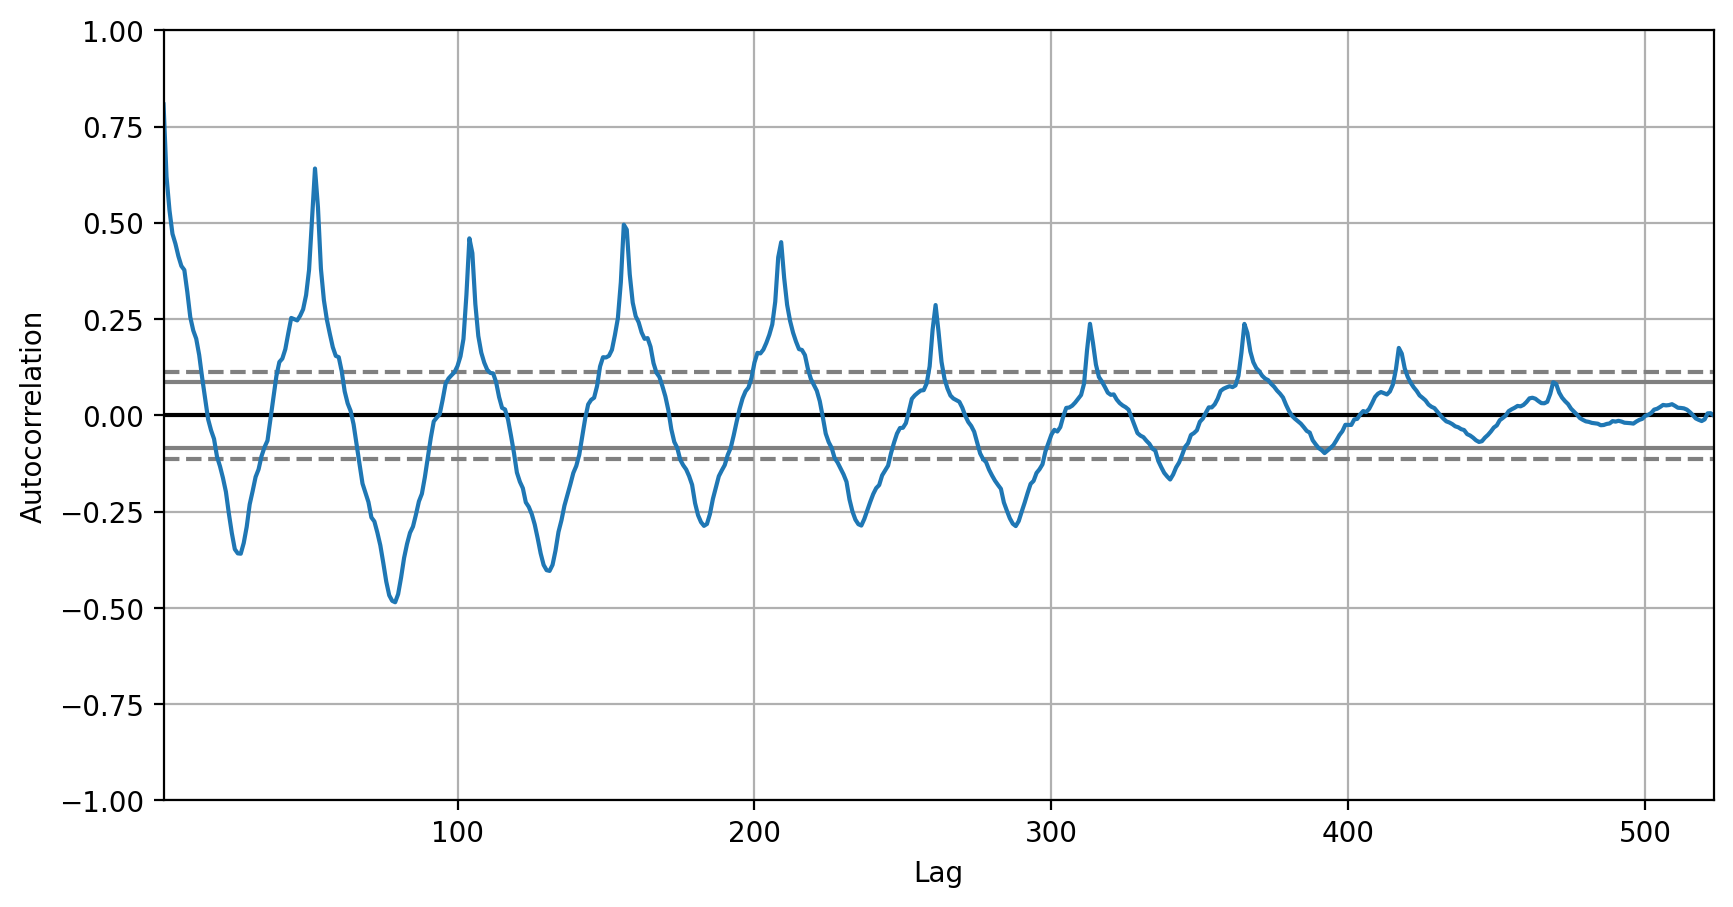

In [82]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())
plt.show()

## 9. Seasonal Decomposition

In [83]:
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)

In [84]:


decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})



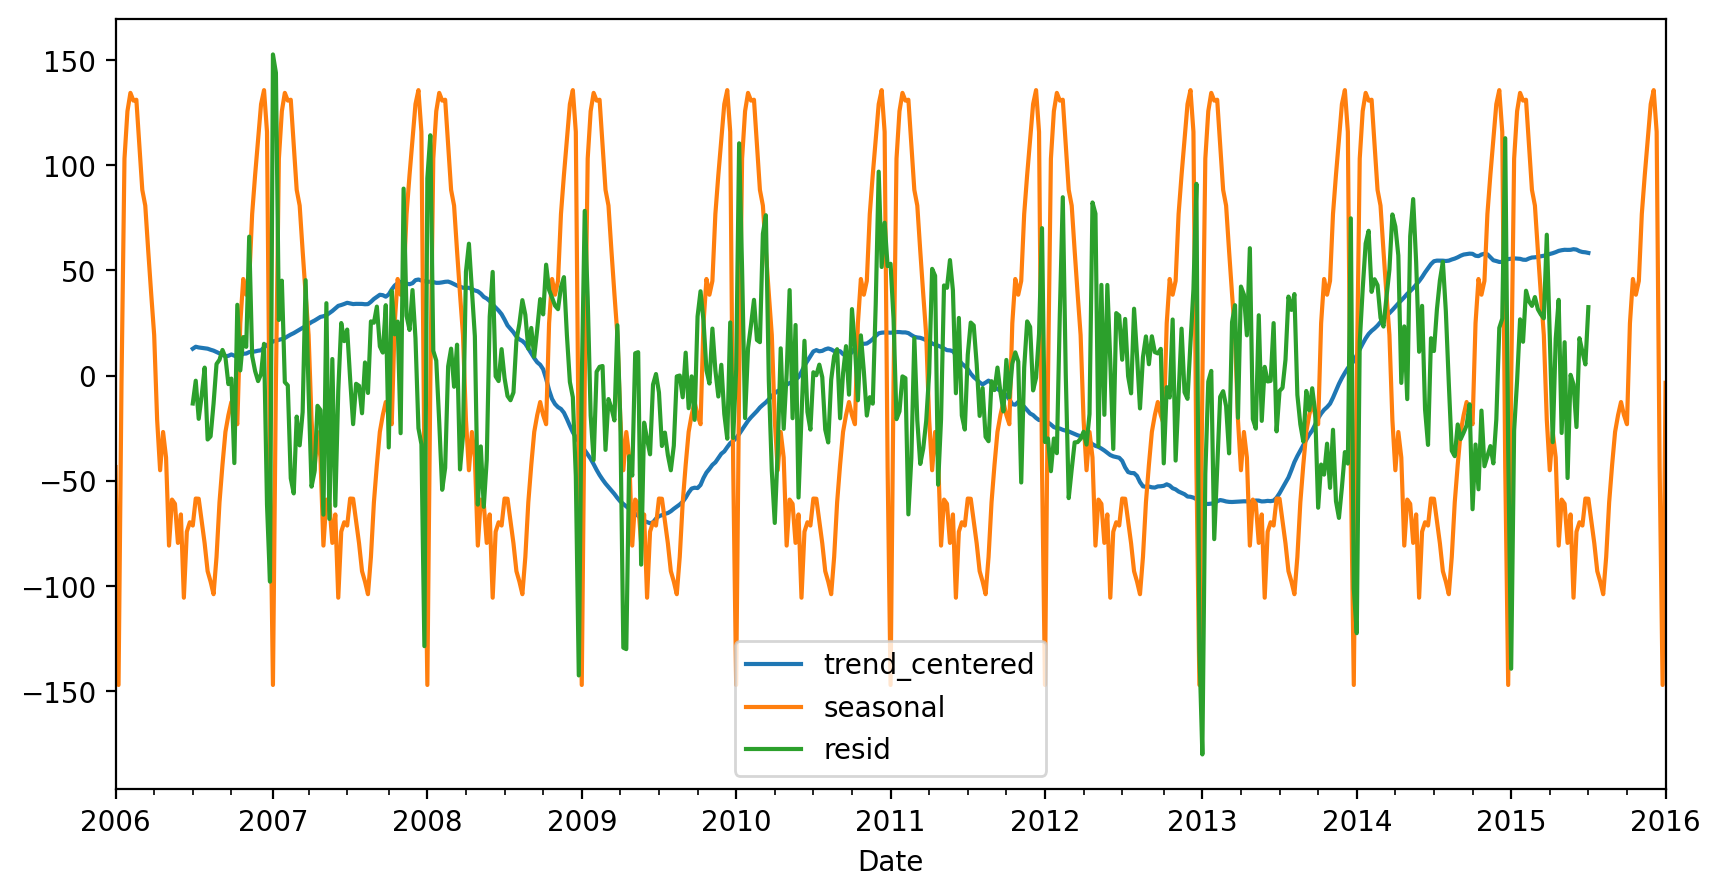

In [85]:
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

## 10. Area Plots

In [86]:
train = train.drop(columns=['y(t + 1)','weekday','day_num'])
train = train.resample('D').mean()
train

Consumption        Wind      Solar  Wind+Solar  month    year
Date                                                                     
2006-01-01     1069.184  164.814173  89.258695  272.663481    1.0  2006.0
2006-01-02     1380.521  164.814173  89.258695  272.663481    1.0  2006.0
2006-01-03     1442.533  164.814173  89.258695  272.663481    1.0  2006.0
2006-01-04     1457.217  164.814173  89.258695  272.663481    1.0  2006.0
2006-01-05     1477.131  164.814173  89.258695  272.663481    1.0  2006.0
...                 ...         ...        ...         ...    ...     ...
2015-12-27     1068.214  440.394000  38.625000  479.019000   12.0  2015.0
2015-12-28     1219.075  206.191000  41.696000  247.887000   12.0  2015.0
2015-12-29     1233.660  305.635000  32.625000  338.260000   12.0  2015.0
2015-12-30     1238.863  365.176000  27.270000  392.446000   12.0  2015.0
2015-12-31     1158.103  358.330000  20.226000  378.556000   12.0  2015.0

[3652 rows x 6 columns]

In [89]:
train['consumption_bin'] = pd.qcut(train.Consumption, 3, labels=['low', 'mid', 'high'])
train.head()

Consumption        Wind      Solar  Wind+Solar  month    year  \
Date                                                                        
2006-01-01     1069.184  164.814173  89.258695  272.663481    1.0  2006.0   
2006-01-02     1380.521  164.814173  89.258695  272.663481    1.0  2006.0   
2006-01-03     1442.533  164.814173  89.258695  272.663481    1.0  2006.0   
2006-01-04     1457.217  164.814173  89.258695  272.663481    1.0  2006.0   
2006-01-05     1477.131  164.814173  89.258695  272.663481    1.0  2006.0   

           temp_bin consumption_bin  
Date                                 
2006-01-01      low             low  
2006-01-02      mid             mid  
2006-01-03     high            high  
2006-01-04     high            high  
2006-01-05     high            high

In [91]:
train.groupby('consumption_bin').resample('M').size().T

consumption_bin  low  mid  high
Date                           
2006-01-31         5    6    20
2006-02-28         4    4    20
2006-03-31         5    4    22
2006-04-30        12   12     6
2006-05-31        11   20     0
...              ...  ...   ...
2015-08-31        10   20     1
2015-09-30         8    4    18
2015-10-31         9    2    20
2015-11-30         6    3    21
2015-12-31        12    5    14

[120 rows x 3 columns]

In [92]:


train.groupby('consumption_bin').mean()



/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_16544/2692406645.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('consumption_bin').mean()


Consumption        Wind      Solar  Wind+Solar     month  \
consumption_bin                                                             
low              1133.376498  148.559369  90.289683  260.942842  6.768473   
mid              1355.630094  137.277502  93.454183  258.602820  6.490551   
high             1500.820103  159.977812  79.760738  256.709176  6.311422   

                        year  
consumption_bin               
low              2010.536946  
mid              2010.267872  
high             2010.694330

In [94]:
ax = (train.groupby('consumption_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area(title='Temp bin over time', ylabel='% of the month'))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.yaxis.set_major_formatter('{:.0%}'.format)


TypeError: <lambda>() got an unexpected keyword argument 'axis'